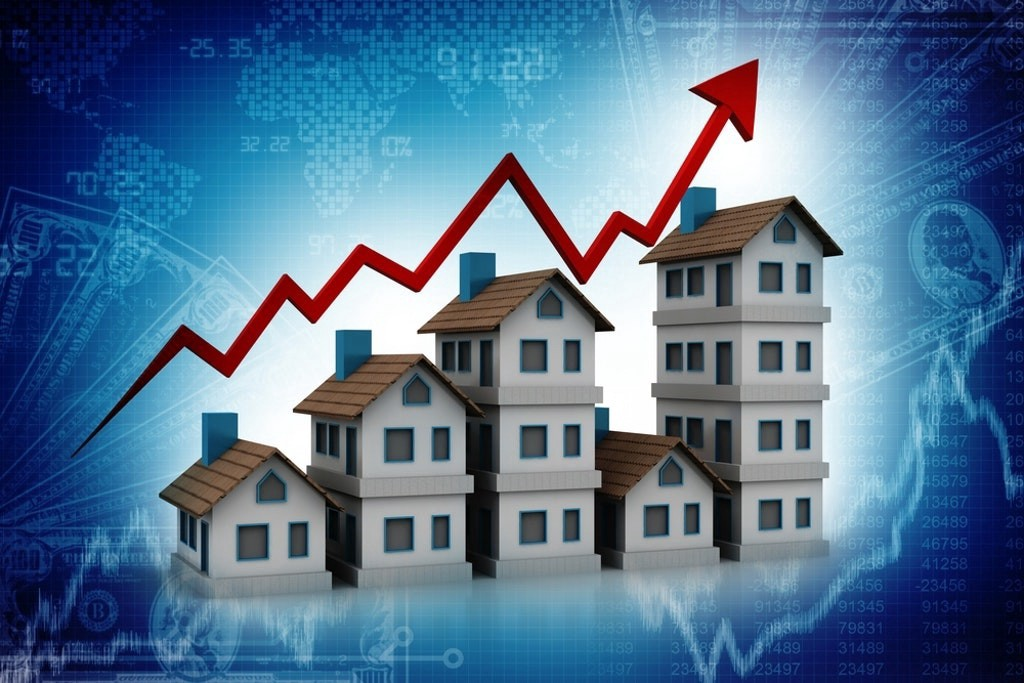

**Description**

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [64]:
#importing packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# set visual mode
sns.set()

# to see all columns
pd.set_option('display.max_columns', None)

#ignore warnings caused by version differences
import warnings
warnings.filterwarnings("ignore")

In [283]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

**Exploratory Data Analysis**

In [284]:
#dropping ID column from train
train.drop(['Id'], axis = 1, inplace = True)

In [217]:
display(train.shape)
display(train.head())
display(test.shape)
display(test.head())

(1460, 80)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

(1459, 80)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [218]:
# Checking missing or null values for train data
missings_train = train.isna().sum().sort_values(ascending=False)
missings_train[missings_train != 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [219]:
# Checking missing or null values for test data
missings_test = test.isna().sum().sort_values(ascending=False)
missings_test[missings_test != 0]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
dtype: int64

In [220]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [221]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [285]:
# Lets split categorical and numerical columns

num_columns = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1',
            'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
            '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
            'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
            'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
            'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
            'EnclosedPorch','3SsnPorch','ScreenPorch',
            'PoolArea','MiscVal','YearBuilt','YearRemodAdd','SalePrice',
            'MoSold','YrSold']
cat_columns = [column for column in train.columns 
                if train[column].dtype == "object" or
                   column not in num_columns]

In [223]:
cat_columns

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [224]:
num_columns

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YearBuilt',
 'YearRemodAdd',
 'SalePrice',
 'MoSold',
 'YrSold']

As we can see there are 3 integer columns which are categorical : 


*   'MSSubClass'
*   'OverallQual'
* 'OverallCond'



In [286]:
#Ordinal columns for label encoding
ordinal_columns = ['LotShape','LandSlope','OverallQual','OverallCond',
                'ExterQual','ExterCond','BsmtQual','BsmtCond',
                'BsmtExposure','BsmtFinType1','BsmtFinType2',
                'HeatingQC','KitchenQual','FireplaceQu','GarageQual',
                'GarageCond','PoolQC']

#Nominal columns for one-hot encoding
nominal_columns = [column for column in cat_columns if column not in ordinal_columns]

In [226]:
ordinal_columns

['LotShape',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PoolQC']

In [227]:
nominal_columns

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

Visualizing categorical columns

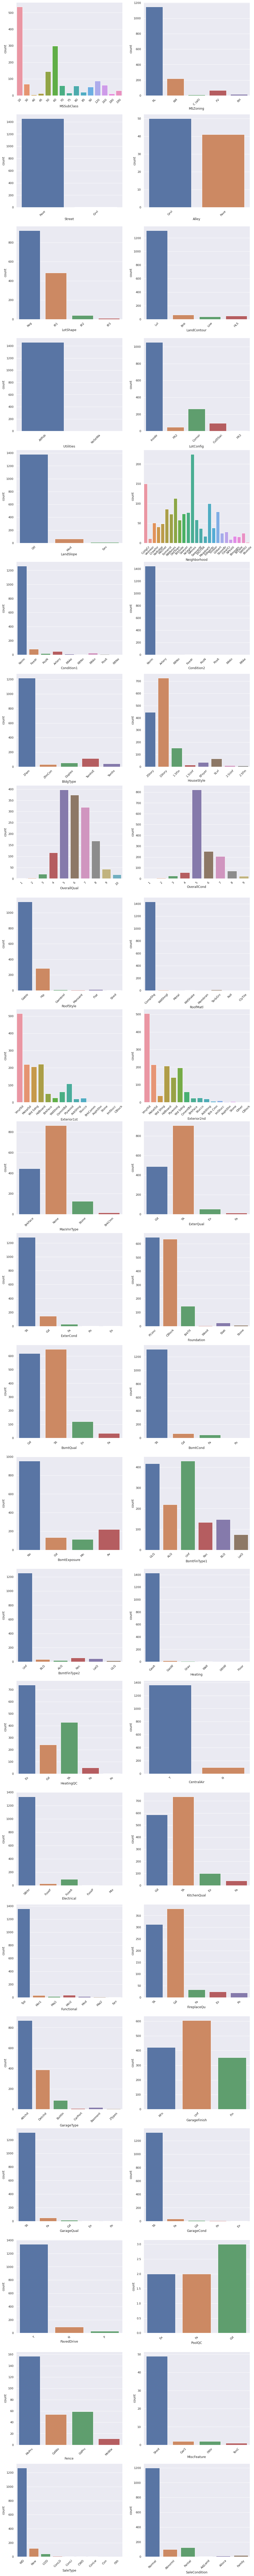

In [228]:
fig, ax = plt.subplots(23, 2, figsize=(16, 180))
for x, subplot in zip(cat_columns, ax.flatten()):
    sns.countplot(train[x], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

In [229]:
def num_investigation(df, col):
    sns.set_color_codes(palette='deep')
    fig, (ax1,ax2, ax3) = plt.subplots(figsize = (15,8), ncols=3,sharey=False)
    sns.distplot(df[col], ax = ax1)
    plt.title(col)    
    stats.probplot(df[col], plot=ax2)
    sns.boxplot(y=df[col],ax=ax3)
    plt.show()

    # Skewness and kurtosis
    print('*'*30)
    print("Skewness: %f" % df[col].skew())
    print("Kurtosis: %f" % df[col].kurt())
    print('*'*30)
  
    # Shapiro-Wilk normality test
    print('*'*30)
    print(col, 'Shapiro-Wilk test t score: ', "{:.2f}".format(stats.shapiro(df[col])[0]))
    print(col, 'Shapiro-Wilk test p value: ', "{:.2f}".format(stats.shapiro(df[col])[1]))
    print('*'*30)

    # Kolmogorov-Smirnov normality test
    print(col, 'Kolmogorov-Smirnov t score: ', "{:.2f}".format(stats.kstest(df[col],'norm', 
                                                                               args=(df[col].mean(),
                                                                                df[col].std()))[0]))
    print(col, 'Kolmogorov-Smirnov p value: ', "{:.2f}".format(stats.kstest(df[col],'norm', 
                                                                               args=(df[col].mean(),
                                                                                     df[col].std()))[1]))

 LotFrontage


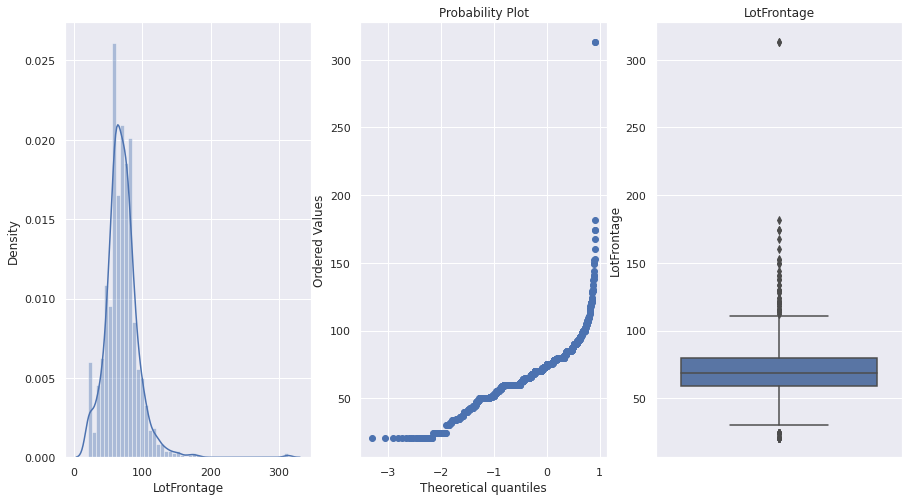

******************************
Skewness: 2.163569
Kurtosis: 17.452867
******************************
******************************
LotFrontage Shapiro-Wilk test t score:  nan
LotFrontage Shapiro-Wilk test p value:  1.00
******************************
LotFrontage Kolmogorov-Smirnov t score:  nan
LotFrontage Kolmogorov-Smirnov p value:  nan


 LotArea


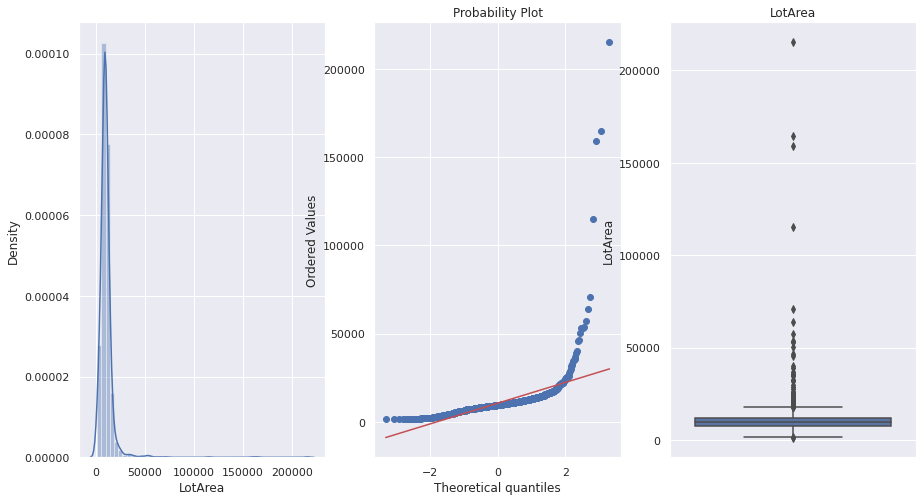

******************************
Skewness: 12.207688
Kurtosis: 203.243271
******************************
******************************
LotArea Shapiro-Wilk test t score:  0.35
LotArea Shapiro-Wilk test p value:  0.00
******************************
LotArea Kolmogorov-Smirnov t score:  0.25
LotArea Kolmogorov-Smirnov p value:  0.00


 MasVnrArea


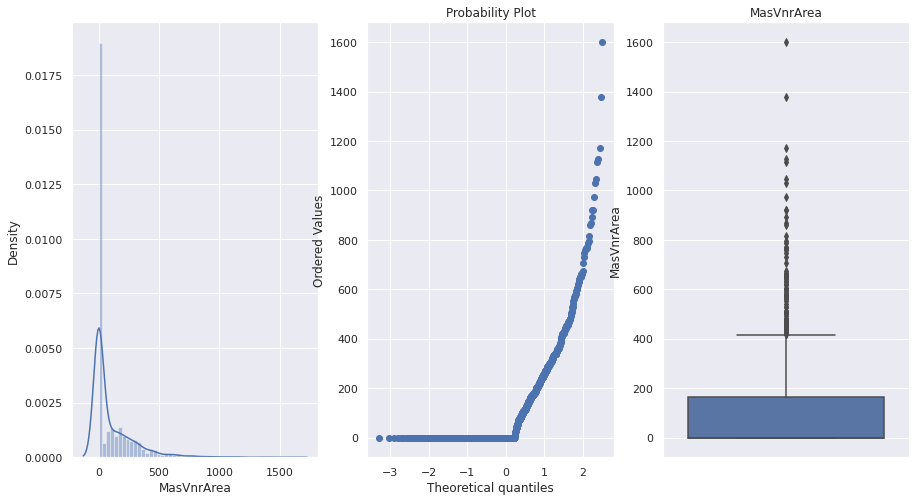

******************************
Skewness: 2.669084
Kurtosis: 10.082417
******************************
******************************
MasVnrArea Shapiro-Wilk test t score:  nan
MasVnrArea Shapiro-Wilk test p value:  1.00
******************************
MasVnrArea Kolmogorov-Smirnov t score:  nan
MasVnrArea Kolmogorov-Smirnov p value:  nan


 BsmtFinSF1


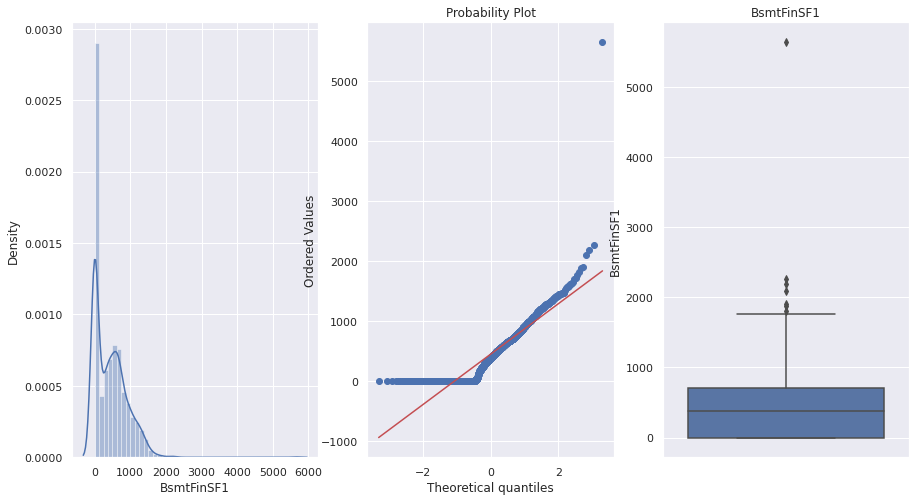

******************************
Skewness: 1.685503
Kurtosis: 11.118236
******************************
******************************
BsmtFinSF1 Shapiro-Wilk test t score:  0.85
BsmtFinSF1 Shapiro-Wilk test p value:  0.00
******************************
BsmtFinSF1 Kolmogorov-Smirnov t score:  0.17
BsmtFinSF1 Kolmogorov-Smirnov p value:  0.00


 BsmtFinSF2


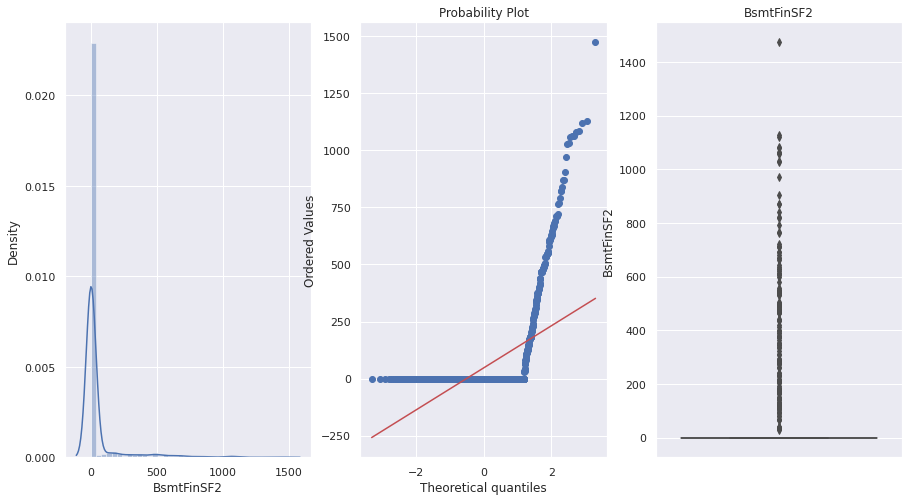

******************************
Skewness: 4.255261
Kurtosis: 20.113338
******************************
******************************
BsmtFinSF2 Shapiro-Wilk test t score:  0.33
BsmtFinSF2 Shapiro-Wilk test p value:  0.00
******************************
BsmtFinSF2 Kolmogorov-Smirnov t score:  0.50
BsmtFinSF2 Kolmogorov-Smirnov p value:  0.00


 BsmtUnfSF


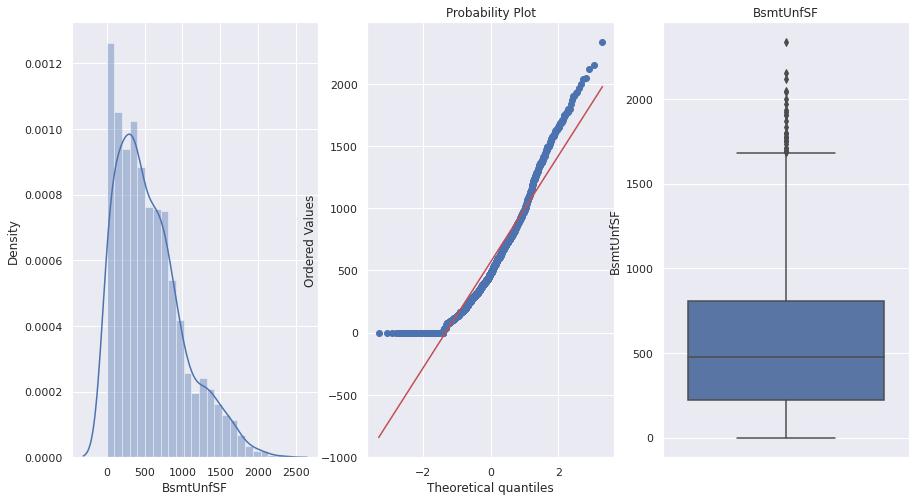

******************************
Skewness: 0.920268
Kurtosis: 0.474994
******************************
******************************
BsmtUnfSF Shapiro-Wilk test t score:  0.93
BsmtUnfSF Shapiro-Wilk test p value:  0.00
******************************
BsmtUnfSF Kolmogorov-Smirnov t score:  0.10
BsmtUnfSF Kolmogorov-Smirnov p value:  0.00


 TotalBsmtSF


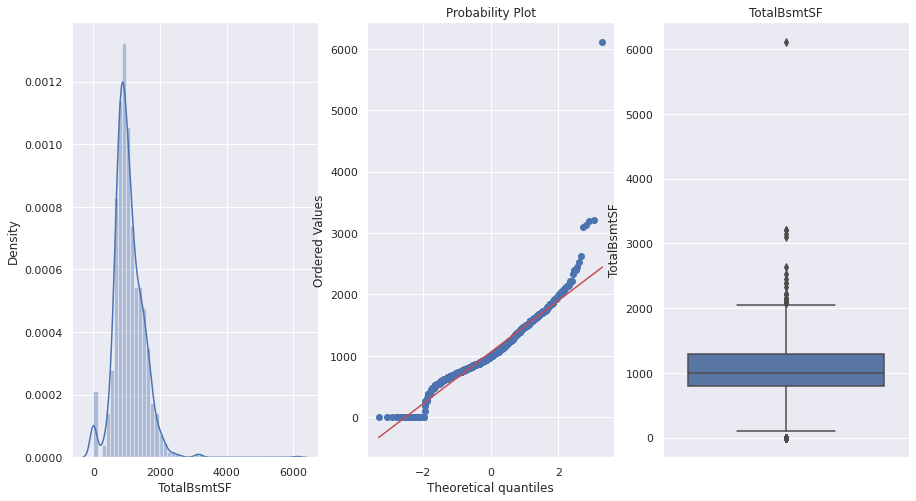

******************************
Skewness: 1.524255
Kurtosis: 13.250483
******************************
******************************
TotalBsmtSF Shapiro-Wilk test t score:  0.92
TotalBsmtSF Shapiro-Wilk test p value:  0.00
******************************
TotalBsmtSF Kolmogorov-Smirnov t score:  0.08
TotalBsmtSF Kolmogorov-Smirnov p value:  0.00


 1stFlrSF


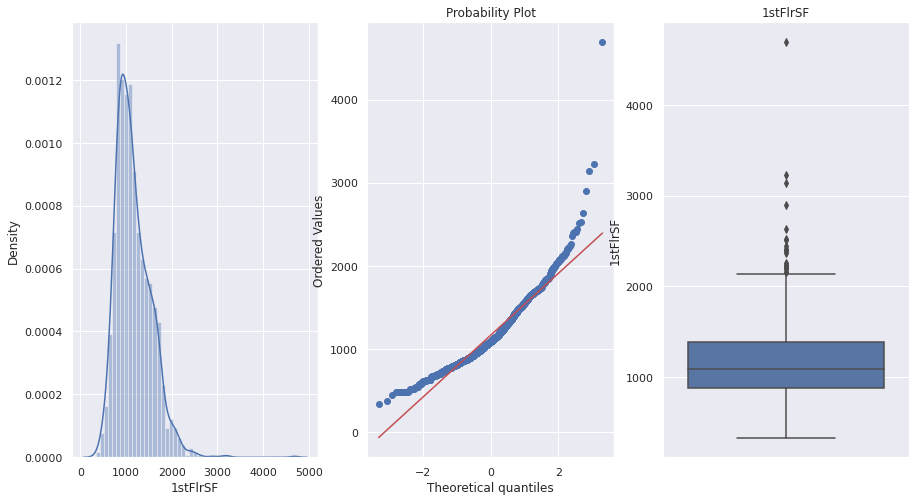

******************************
Skewness: 1.376757
Kurtosis: 5.745841
******************************
******************************
1stFlrSF Shapiro-Wilk test t score:  0.93
1stFlrSF Shapiro-Wilk test p value:  0.00
******************************
1stFlrSF Kolmogorov-Smirnov t score:  0.09
1stFlrSF Kolmogorov-Smirnov p value:  0.00


 2ndFlrSF


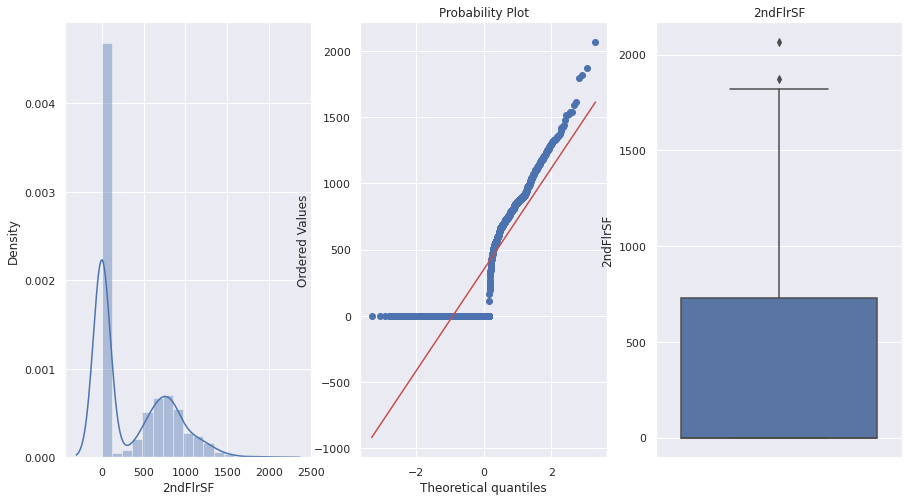

******************************
Skewness: 0.813030
Kurtosis: -0.553464
******************************
******************************
2ndFlrSF Shapiro-Wilk test t score:  0.77
2ndFlrSF Shapiro-Wilk test p value:  0.00
******************************
2ndFlrSF Kolmogorov-Smirnov t score:  0.35
2ndFlrSF Kolmogorov-Smirnov p value:  0.00


 LowQualFinSF


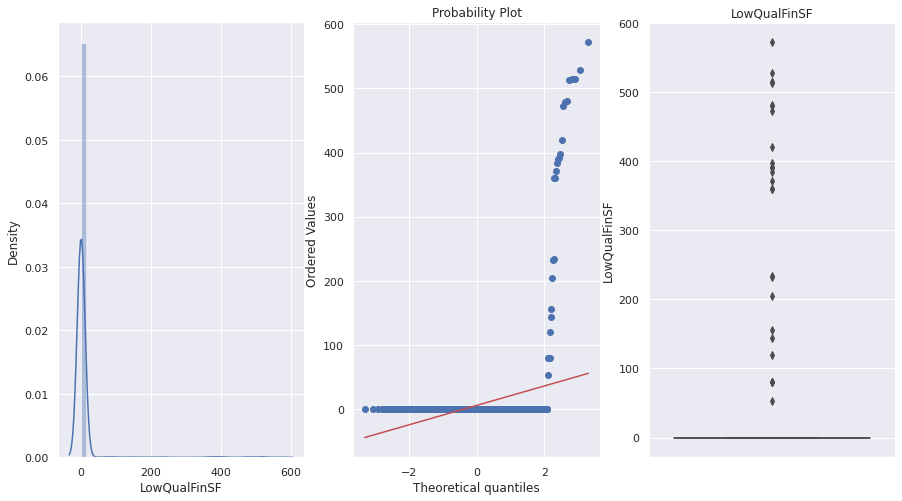

******************************
Skewness: 9.011341
Kurtosis: 83.234817
******************************
******************************
LowQualFinSF Shapiro-Wilk test t score:  0.10
LowQualFinSF Shapiro-Wilk test p value:  0.00
******************************
LowQualFinSF Kolmogorov-Smirnov t score:  0.53
LowQualFinSF Kolmogorov-Smirnov p value:  0.00


 GrLivArea


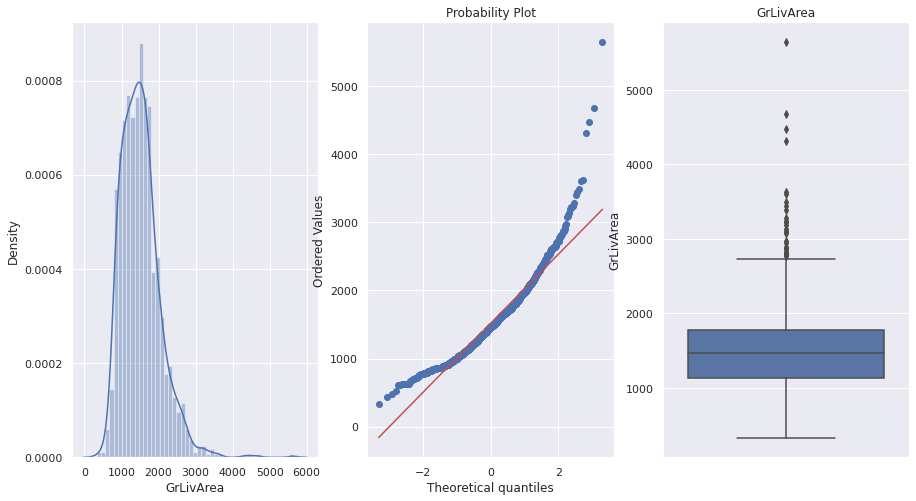

******************************
Skewness: 1.366560
Kurtosis: 4.895121
******************************
******************************
GrLivArea Shapiro-Wilk test t score:  0.93
GrLivArea Shapiro-Wilk test p value:  0.00
******************************
GrLivArea Kolmogorov-Smirnov t score:  0.07
GrLivArea Kolmogorov-Smirnov p value:  0.00


 BsmtFullBath


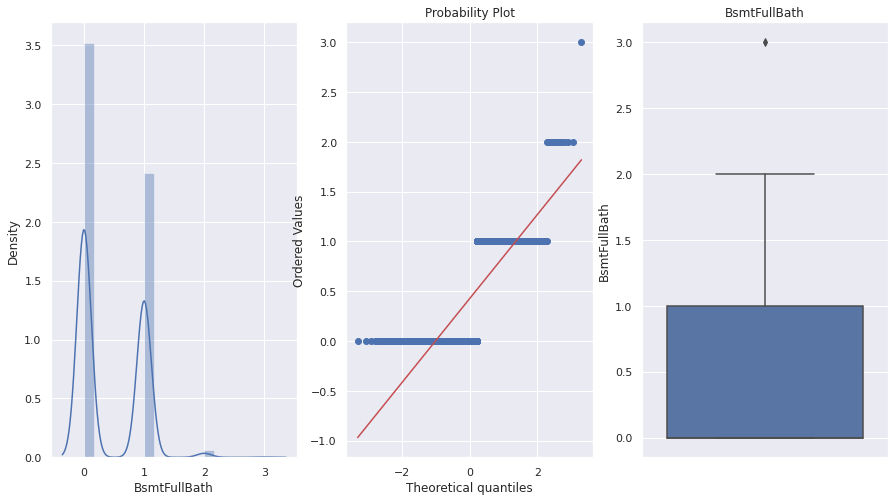

******************************
Skewness: 0.596067
Kurtosis: -0.839098
******************************
******************************
BsmtFullBath Shapiro-Wilk test t score:  0.66
BsmtFullBath Shapiro-Wilk test p value:  0.00
******************************
BsmtFullBath Kolmogorov-Smirnov t score:  0.38
BsmtFullBath Kolmogorov-Smirnov p value:  0.00


 BsmtHalfBath


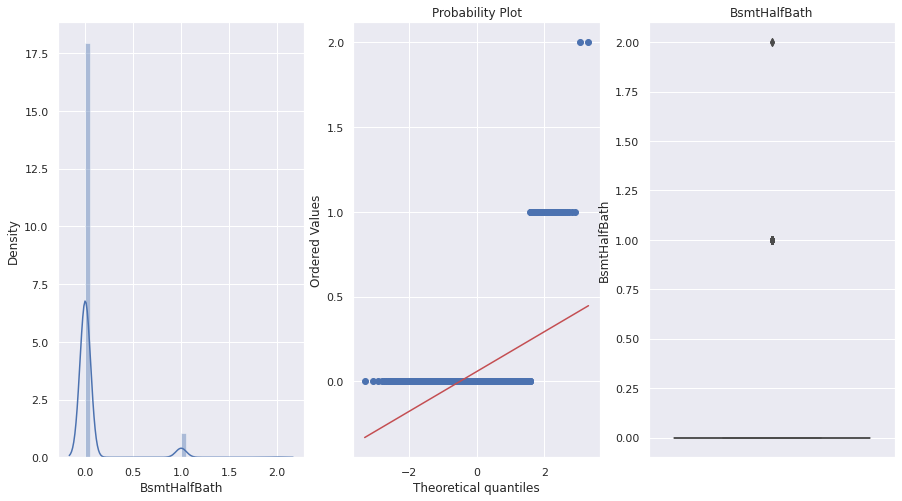

******************************
Skewness: 4.103403
Kurtosis: 16.396642
******************************
******************************
BsmtHalfBath Shapiro-Wilk test t score:  0.24
BsmtHalfBath Shapiro-Wilk test p value:  0.00
******************************
BsmtHalfBath Kolmogorov-Smirnov t score:  0.54
BsmtHalfBath Kolmogorov-Smirnov p value:  0.00


 FullBath


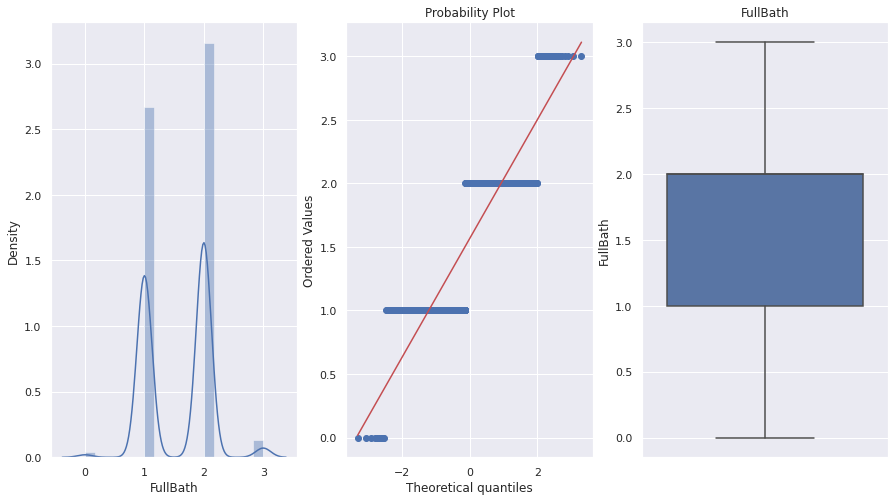

******************************
Skewness: 0.036562
Kurtosis: -0.857043
******************************
******************************
FullBath Shapiro-Wilk test t score:  0.72
FullBath Shapiro-Wilk test p value:  0.00
******************************
FullBath Kolmogorov-Smirnov t score:  0.33
FullBath Kolmogorov-Smirnov p value:  0.00


 HalfBath


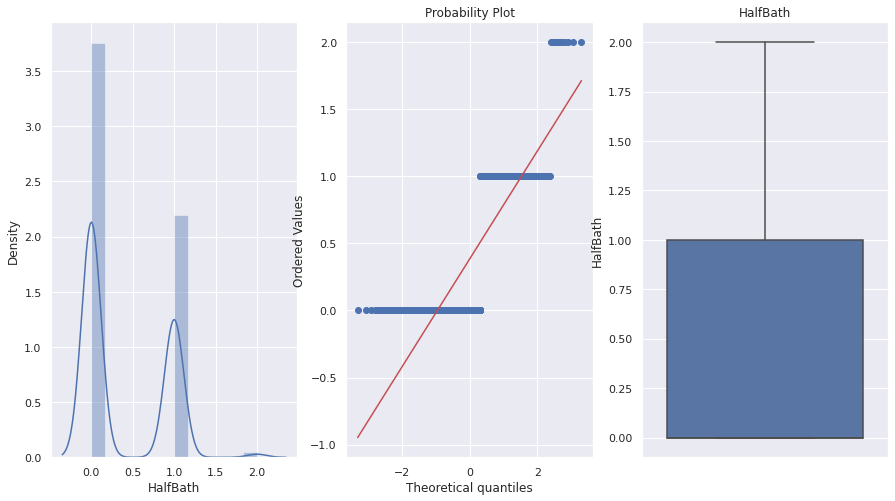

******************************
Skewness: 0.675897
Kurtosis: -1.076927
******************************
******************************
HalfBath Shapiro-Wilk test t score:  0.64
HalfBath Shapiro-Wilk test p value:  0.00
******************************
HalfBath Kolmogorov-Smirnov t score:  0.40
HalfBath Kolmogorov-Smirnov p value:  0.00


 BedroomAbvGr


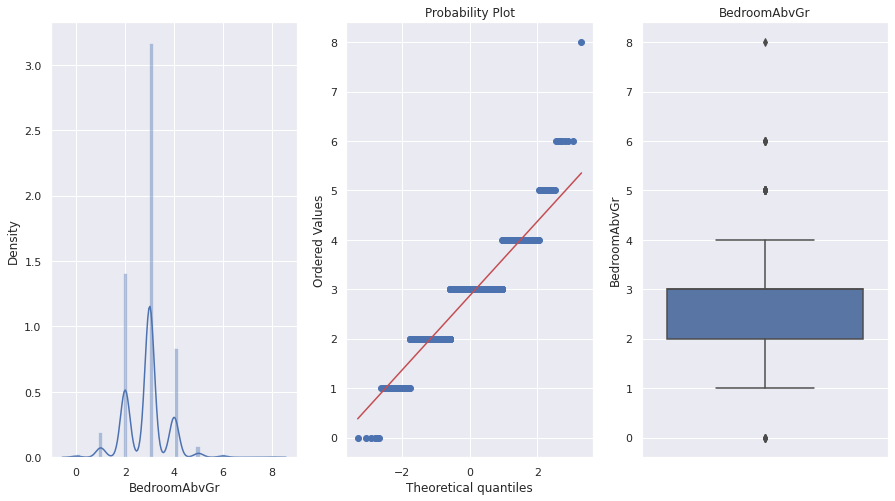

******************************
Skewness: 0.211790
Kurtosis: 2.230875
******************************
******************************
BedroomAbvGr Shapiro-Wilk test t score:  0.85
BedroomAbvGr Shapiro-Wilk test p value:  0.00
******************************
BedroomAbvGr Kolmogorov-Smirnov t score:  0.28
BedroomAbvGr Kolmogorov-Smirnov p value:  0.00


 KitchenAbvGr


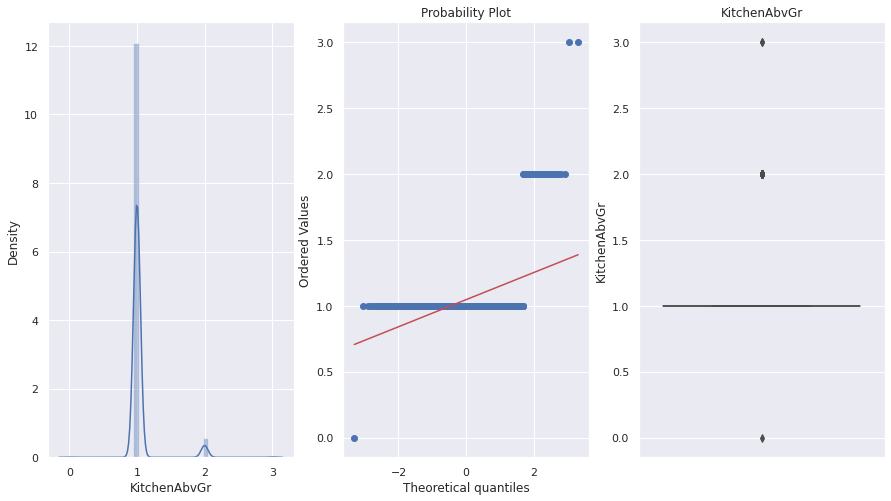

******************************
Skewness: 4.488397
Kurtosis: 21.532404
******************************
******************************
KitchenAbvGr Shapiro-Wilk test t score:  0.22
KitchenAbvGr Shapiro-Wilk test p value:  0.00
******************************
KitchenAbvGr Kolmogorov-Smirnov t score:  0.54
KitchenAbvGr Kolmogorov-Smirnov p value:  0.00


 TotRmsAbvGrd


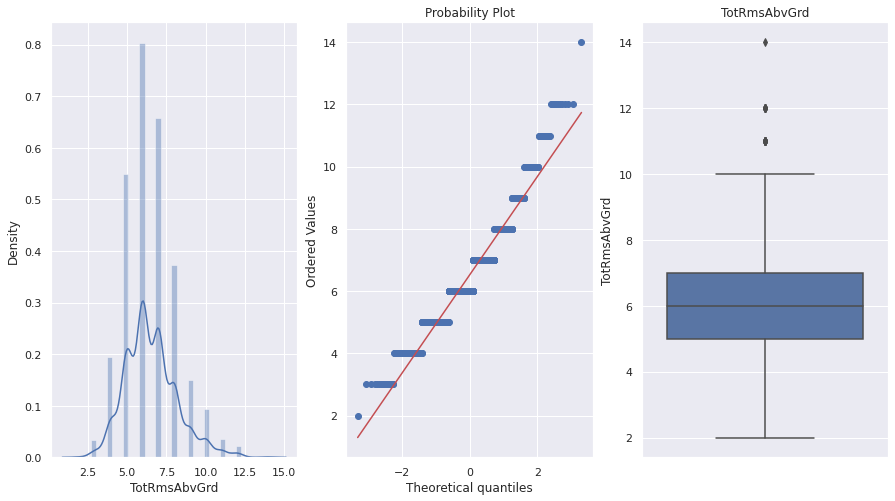

******************************
Skewness: 0.676341
Kurtosis: 0.880762
******************************
******************************
TotRmsAbvGrd Shapiro-Wilk test t score:  0.94
TotRmsAbvGrd Shapiro-Wilk test p value:  0.00
******************************
TotRmsAbvGrd Kolmogorov-Smirnov t score:  0.17
TotRmsAbvGrd Kolmogorov-Smirnov p value:  0.00


 Fireplaces


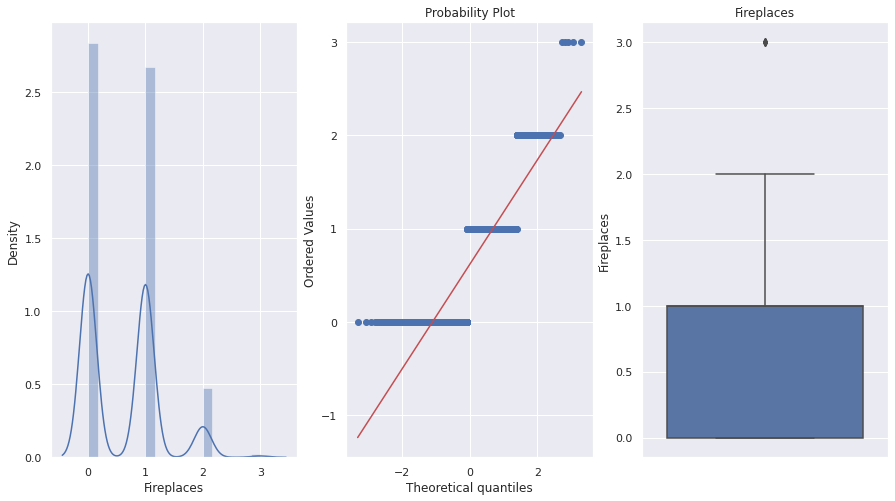

******************************
Skewness: 0.649565
Kurtosis: -0.217237
******************************
******************************
Fireplaces Shapiro-Wilk test t score:  0.76
Fireplaces Shapiro-Wilk test p value:  0.00
******************************
Fireplaces Kolmogorov-Smirnov t score:  0.30
Fireplaces Kolmogorov-Smirnov p value:  0.00


 GarageYrBlt


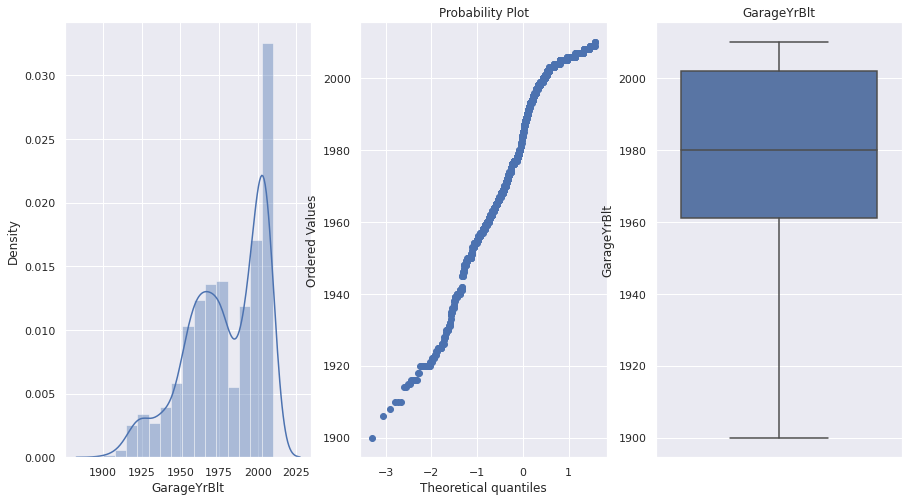

******************************
Skewness: -0.649415
Kurtosis: -0.418341
******************************
******************************
GarageYrBlt Shapiro-Wilk test t score:  nan
GarageYrBlt Shapiro-Wilk test p value:  1.00
******************************
GarageYrBlt Kolmogorov-Smirnov t score:  nan
GarageYrBlt Kolmogorov-Smirnov p value:  nan


 GarageCars


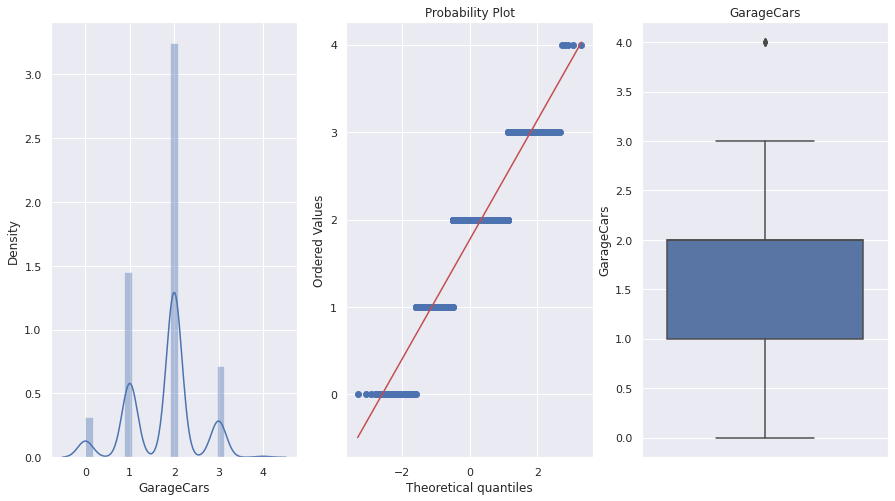

******************************
Skewness: -0.342549
Kurtosis: 0.220998
******************************
******************************
GarageCars Shapiro-Wilk test t score:  0.84
GarageCars Shapiro-Wilk test p value:  0.00
******************************
GarageCars Kolmogorov-Smirnov t score:  0.31
GarageCars Kolmogorov-Smirnov p value:  0.00


 GarageArea


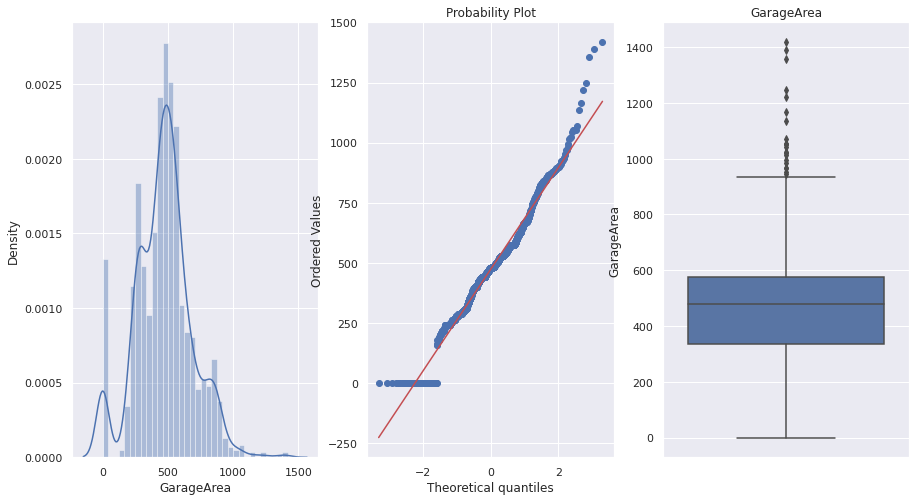

******************************
Skewness: 0.179981
Kurtosis: 0.917067
******************************
******************************
GarageArea Shapiro-Wilk test t score:  0.98
GarageArea Shapiro-Wilk test p value:  0.00
******************************
GarageArea Kolmogorov-Smirnov t score:  0.08
GarageArea Kolmogorov-Smirnov p value:  0.00


 WoodDeckSF


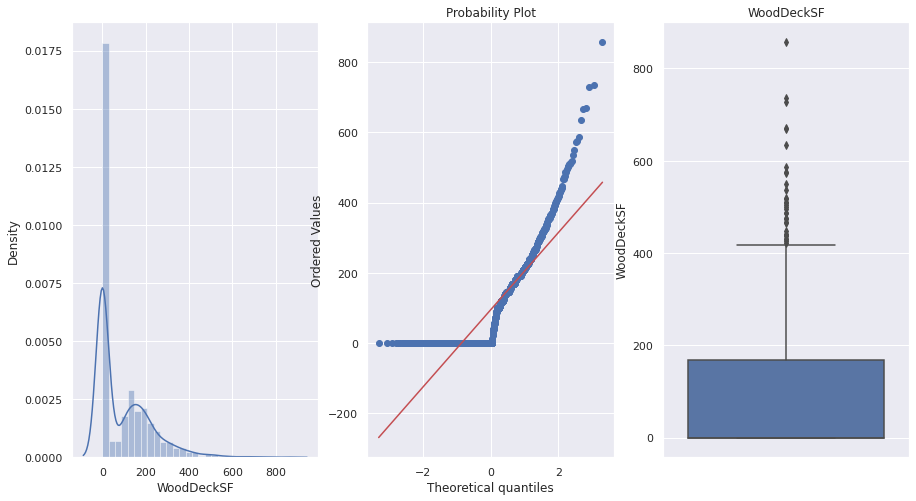

******************************
Skewness: 1.541376
Kurtosis: 2.992951
******************************
******************************
WoodDeckSF Shapiro-Wilk test t score:  0.77
WoodDeckSF Shapiro-Wilk test p value:  0.00
******************************
WoodDeckSF Kolmogorov-Smirnov t score:  0.30
WoodDeckSF Kolmogorov-Smirnov p value:  0.00


 OpenPorchSF


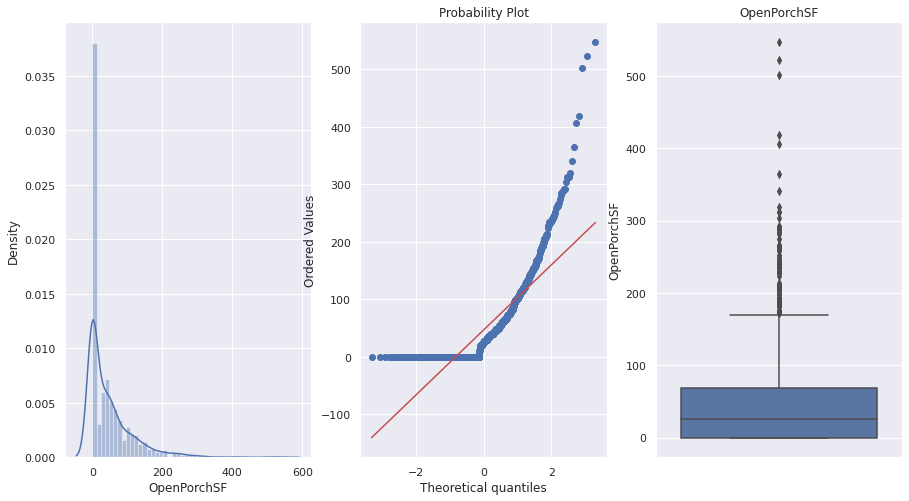

******************************
Skewness: 2.364342
Kurtosis: 8.490336
******************************
******************************
OpenPorchSF Shapiro-Wilk test t score:  0.73
OpenPorchSF Shapiro-Wilk test p value:  0.00
******************************
OpenPorchSF Kolmogorov-Smirnov t score:  0.24
OpenPorchSF Kolmogorov-Smirnov p value:  0.00


 EnclosedPorch


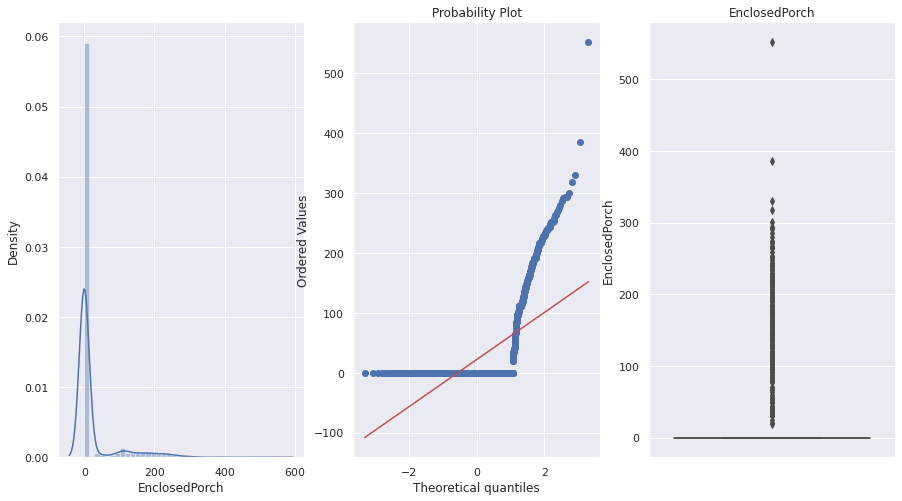

******************************
Skewness: 3.089872
Kurtosis: 10.430766
******************************
******************************
EnclosedPorch Shapiro-Wilk test t score:  0.41
EnclosedPorch Shapiro-Wilk test p value:  0.00
******************************
EnclosedPorch Kolmogorov-Smirnov t score:  0.50
EnclosedPorch Kolmogorov-Smirnov p value:  0.00


 3SsnPorch


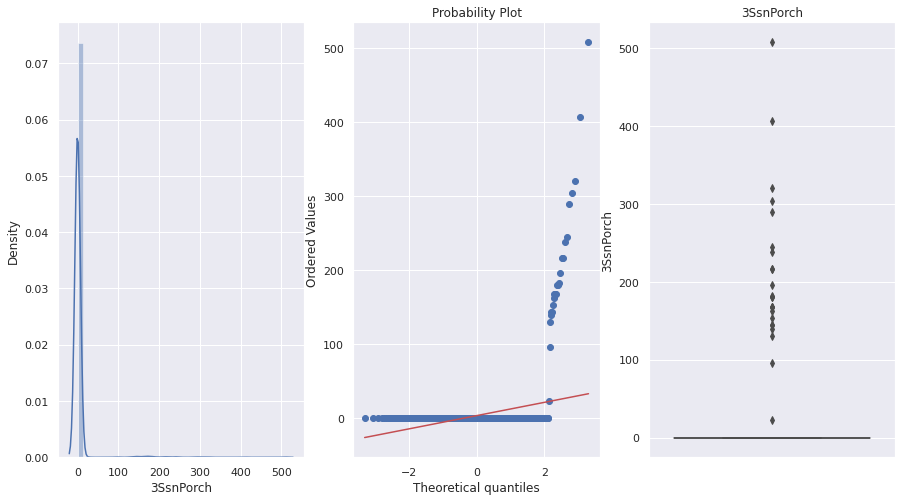

******************************
Skewness: 10.304342
Kurtosis: 123.662379
******************************
******************************
3SsnPorch Shapiro-Wilk test t score:  0.09
3SsnPorch Shapiro-Wilk test p value:  0.00
******************************
3SsnPorch Kolmogorov-Smirnov t score:  0.53
3SsnPorch Kolmogorov-Smirnov p value:  0.00


 ScreenPorch


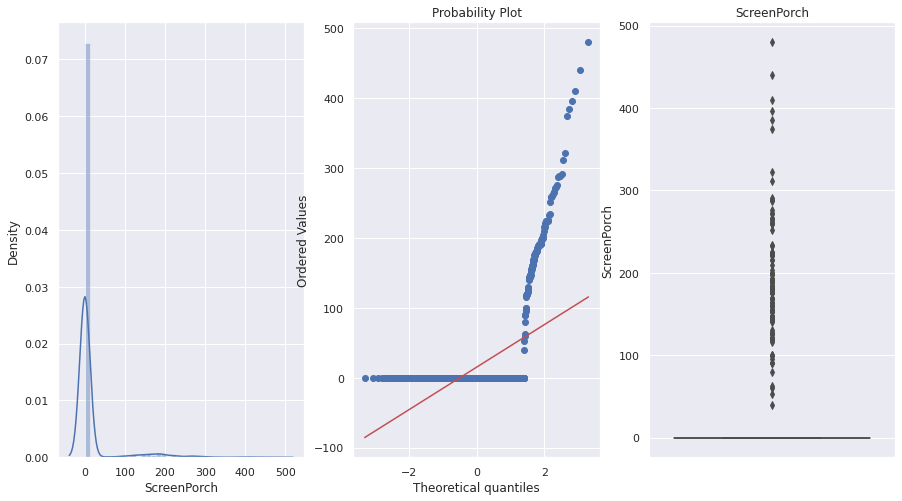

******************************
Skewness: 4.122214
Kurtosis: 18.439068
******************************
******************************
ScreenPorch Shapiro-Wilk test t score:  0.30
ScreenPorch Shapiro-Wilk test p value:  0.00
******************************
ScreenPorch Kolmogorov-Smirnov t score:  0.53
ScreenPorch Kolmogorov-Smirnov p value:  0.00


 PoolArea


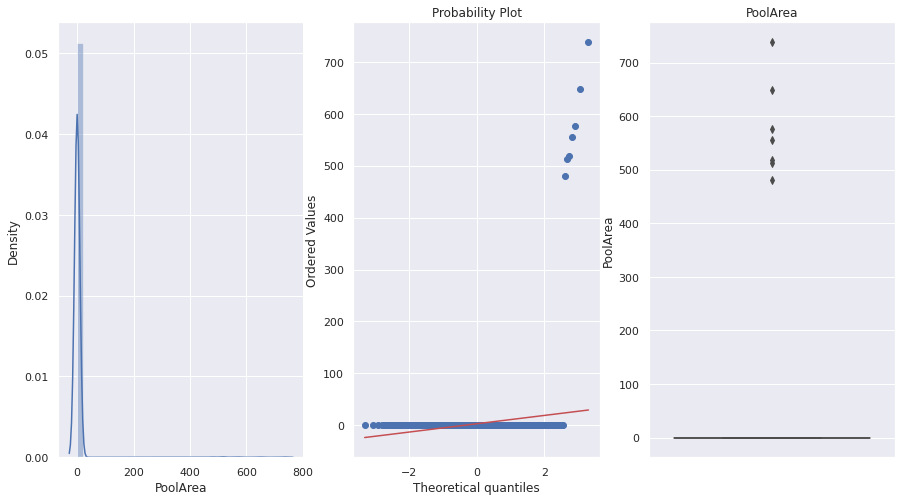

******************************
Skewness: 14.828374
Kurtosis: 223.268499
******************************
******************************
PoolArea Shapiro-Wilk test t score:  0.04
PoolArea Shapiro-Wilk test p value:  0.00
******************************
PoolArea Kolmogorov-Smirnov t score:  0.52
PoolArea Kolmogorov-Smirnov p value:  0.00


 MiscVal


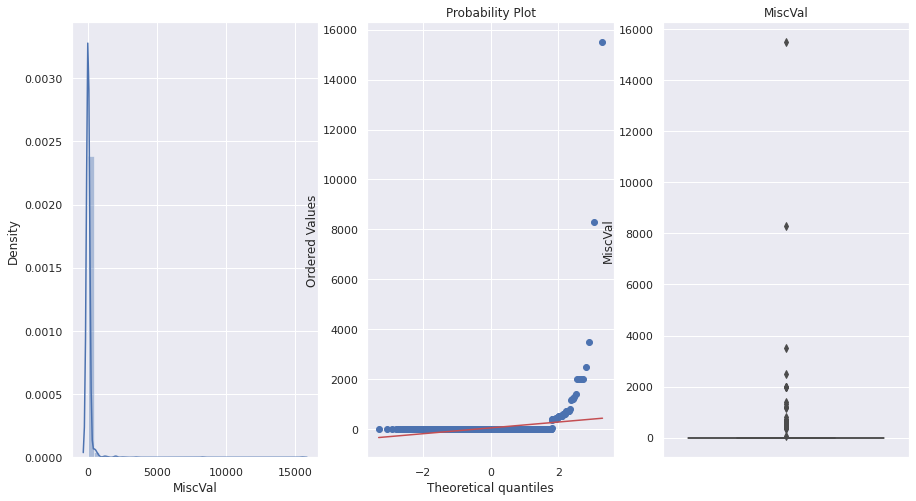

******************************
Skewness: 24.476794
Kurtosis: 701.003342
******************************
******************************
MiscVal Shapiro-Wilk test t score:  0.06
MiscVal Shapiro-Wilk test p value:  0.00
******************************
MiscVal Kolmogorov-Smirnov t score:  0.50
MiscVal Kolmogorov-Smirnov p value:  0.00


 YearBuilt


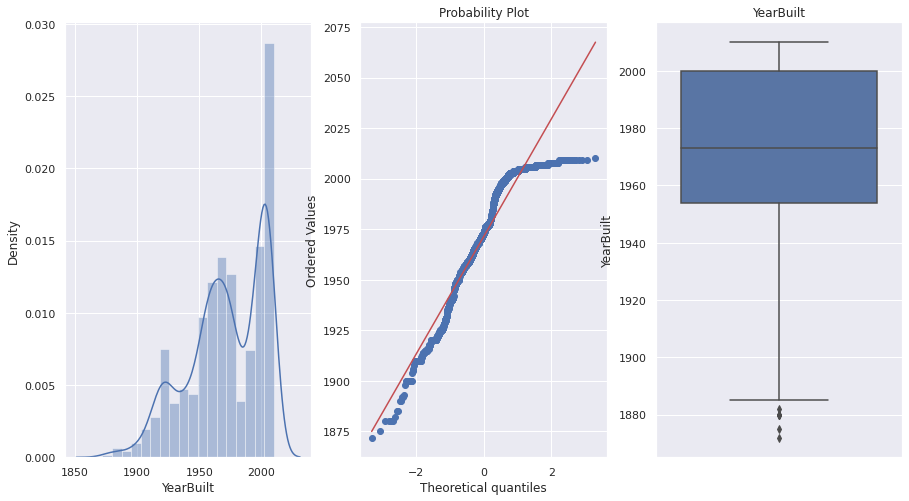

******************************
Skewness: -0.613461
Kurtosis: -0.439552
******************************
******************************
YearBuilt Shapiro-Wilk test t score:  0.93
YearBuilt Shapiro-Wilk test p value:  0.00
******************************
YearBuilt Kolmogorov-Smirnov t score:  0.12
YearBuilt Kolmogorov-Smirnov p value:  0.00


 YearRemodAdd


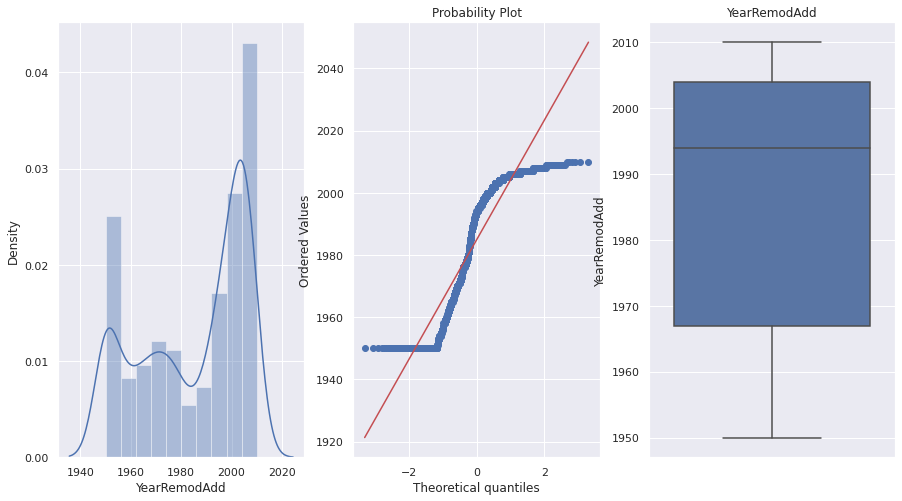

******************************
Skewness: -0.503562
Kurtosis: -1.272245
******************************
******************************
YearRemodAdd Shapiro-Wilk test t score:  0.86
YearRemodAdd Shapiro-Wilk test p value:  0.00
******************************
YearRemodAdd Kolmogorov-Smirnov t score:  0.17
YearRemodAdd Kolmogorov-Smirnov p value:  0.00


 SalePrice


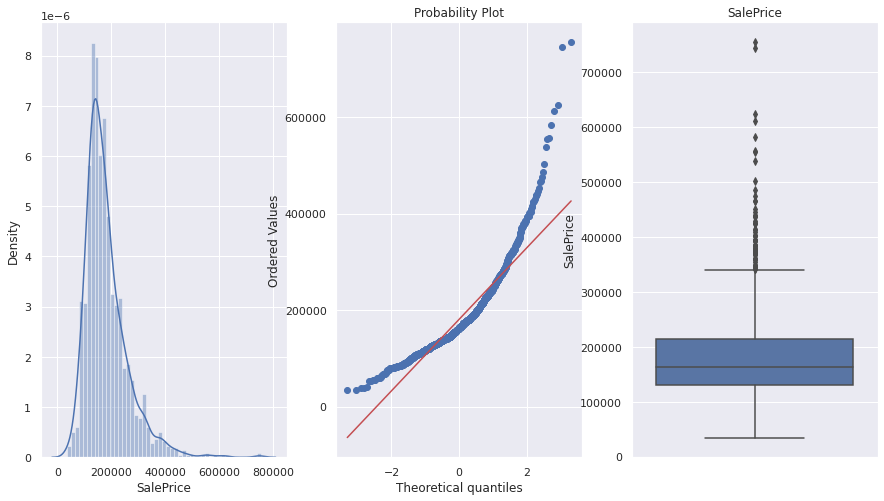

******************************
Skewness: 1.882876
Kurtosis: 6.536282
******************************
******************************
SalePrice Shapiro-Wilk test t score:  0.87
SalePrice Shapiro-Wilk test p value:  0.00
******************************
SalePrice Kolmogorov-Smirnov t score:  0.12
SalePrice Kolmogorov-Smirnov p value:  0.00


 MoSold


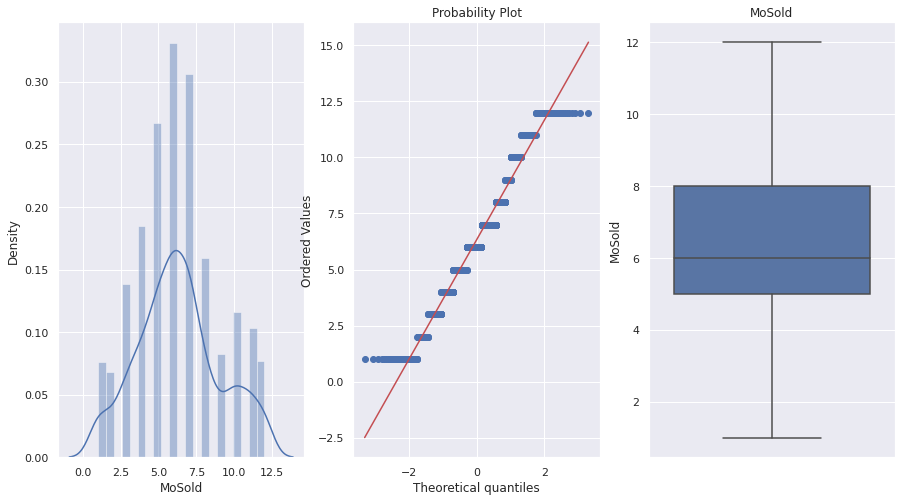

******************************
Skewness: 0.212053
Kurtosis: -0.404109
******************************
******************************
MoSold Shapiro-Wilk test t score:  0.97
MoSold Shapiro-Wilk test p value:  0.00
******************************
MoSold Kolmogorov-Smirnov t score:  0.12
MoSold Kolmogorov-Smirnov p value:  0.00


 YrSold


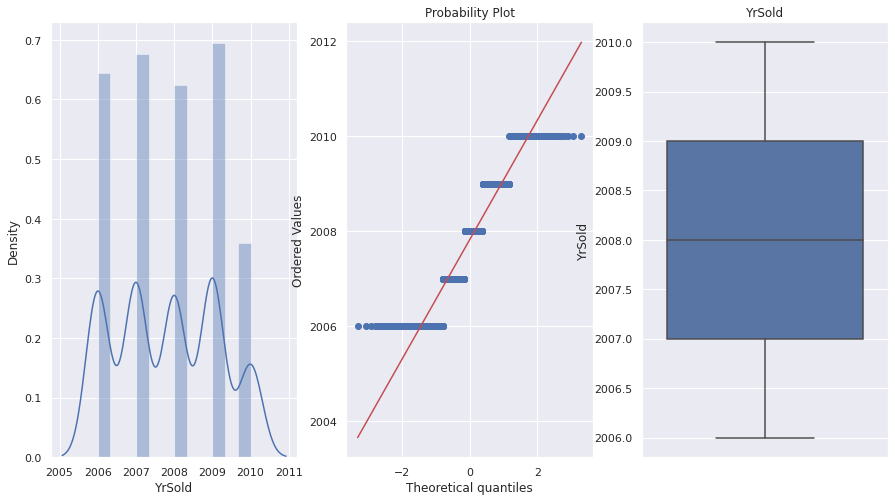

******************************
Skewness: 0.096269
Kurtosis: -1.190601
******************************
******************************
YrSold Shapiro-Wilk test t score:  0.90
YrSold Shapiro-Wilk test p value:  0.00
******************************
YrSold Kolmogorov-Smirnov t score:  0.17
YrSold Kolmogorov-Smirnov p value:  0.00




In [230]:
for x in train[num_columns].columns:
    print("\033[1m", x)
    num_investigation(train[num_columns], x)
    print('\n')

Many numeric features has outliers. If we look general features have right skewness, and high kurtosis. We need to deal with skewness and normalize columns

* We will accept Skewness range -0.5,0.5 and Kurtosis -3,3

* p>0.05 is accepted as Normal Distribution and all columns has a p value lower than 0.05

* Kolmogorov-Smirnov and Shapiro-Wilk test results indicate no ND of these data. We'll use boxcox1p transformation for these variables.

In [231]:
#Checking features that correlated with Saleprice
corr = train.corr()
corr['SalePrice'].sort_values(ascending=False)[0:15]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

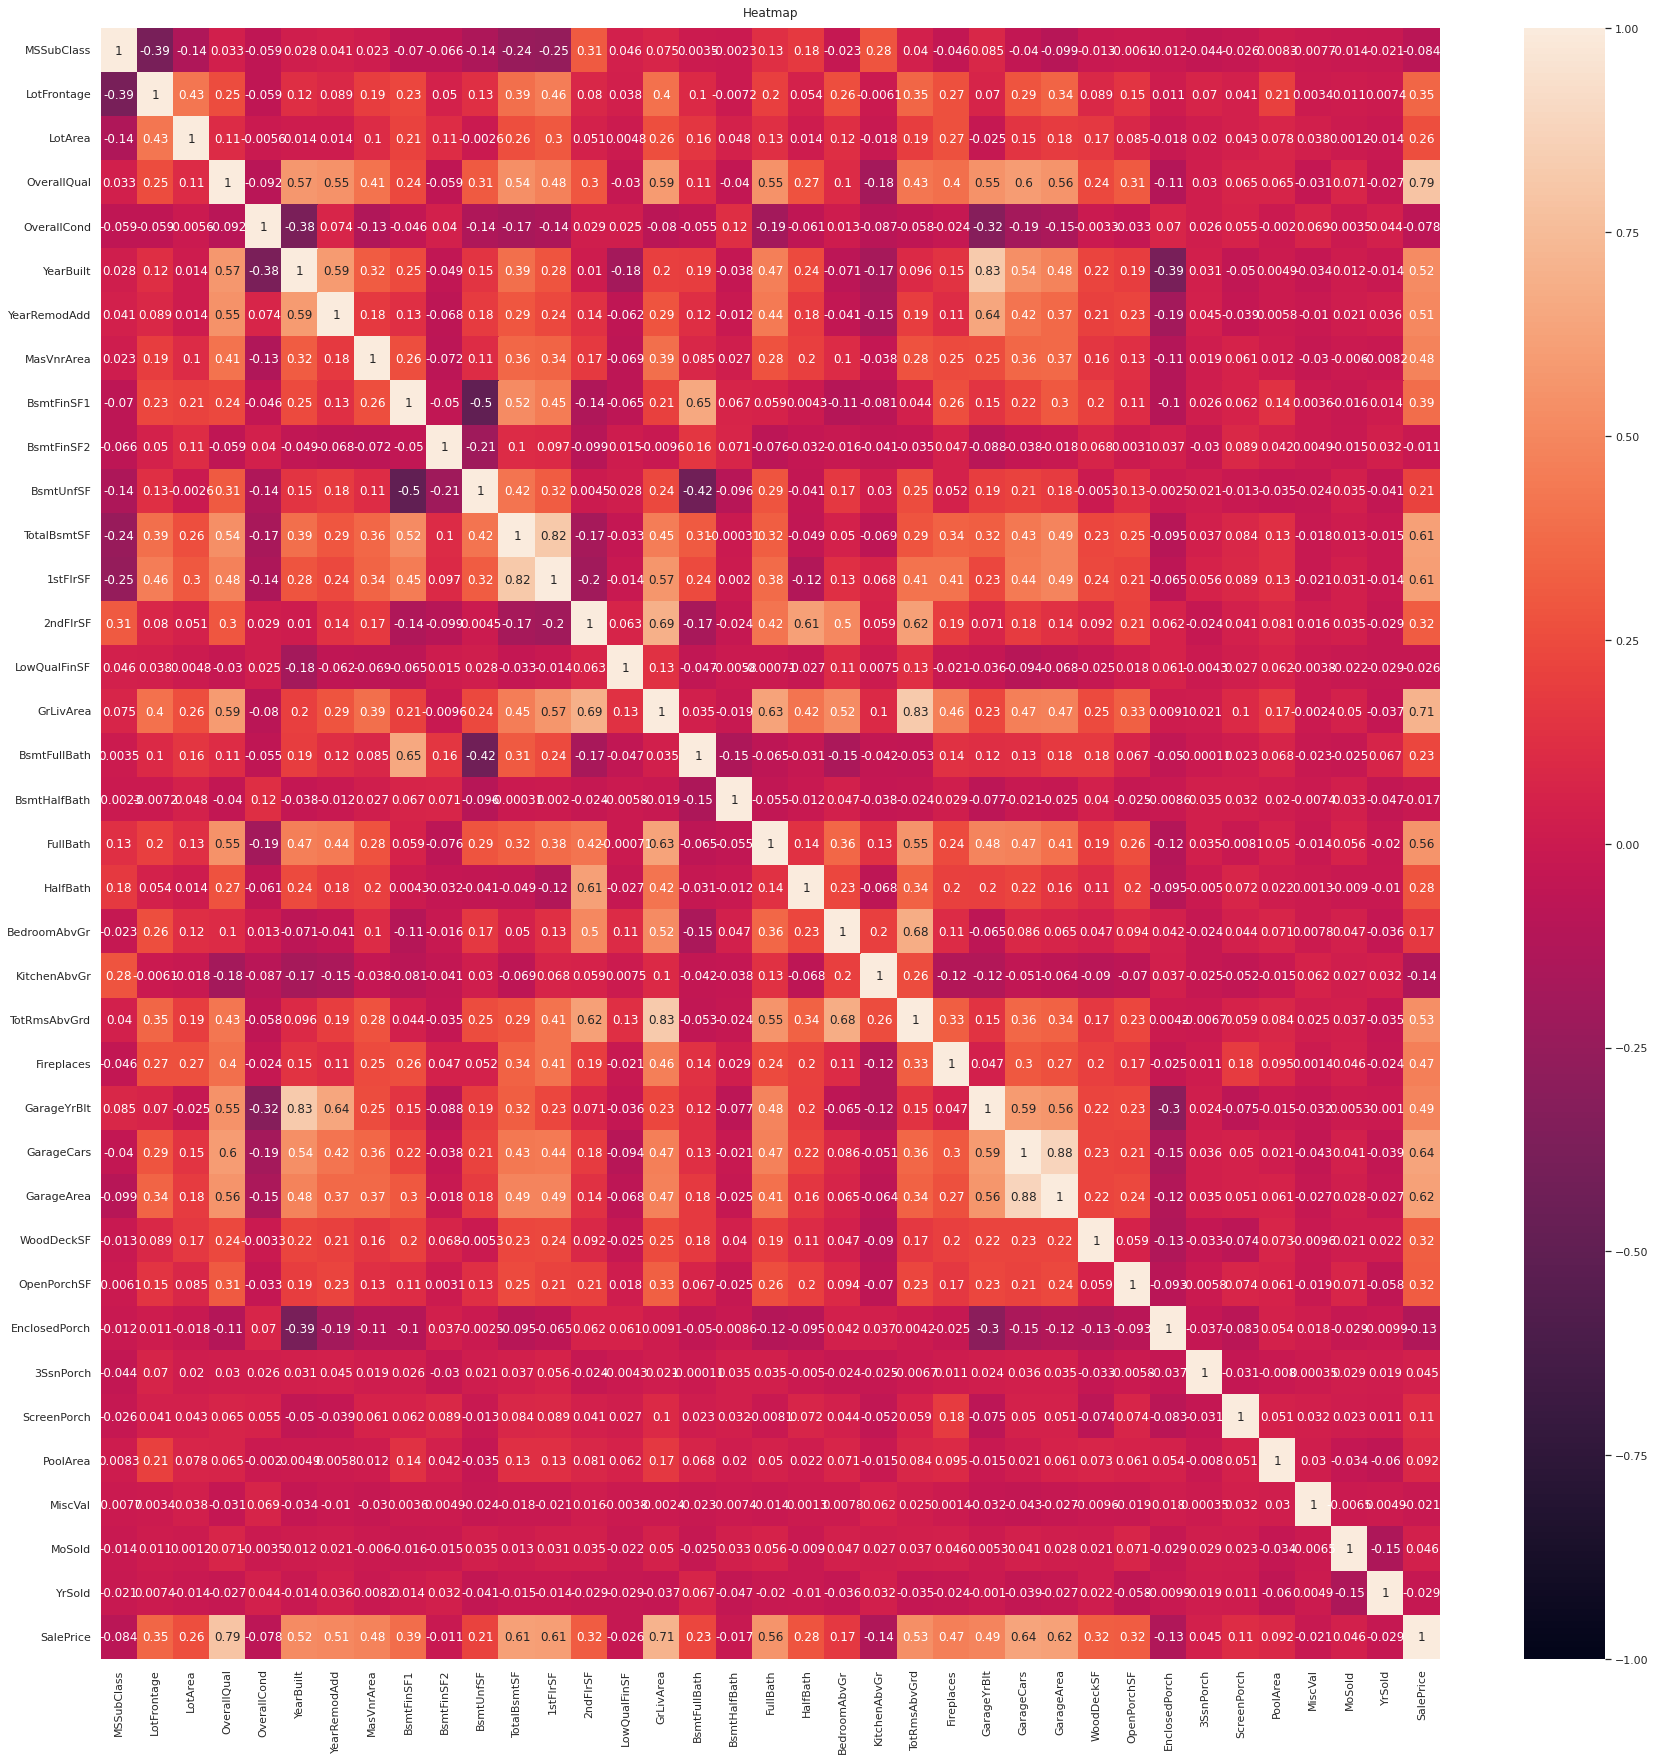

In [232]:
# Heatmap for correlation
plt.figure(figsize=(30, 30))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap', fontdict={'fontsize':12}, pad=12);

There are 10 features which have correlation more than 0.5 to 'SalePrice':

1. OverallQual: Overall material and finish quality
2. TotalBsmtSF: Total square feet of basement area
3. 1stFlrSF: First Floor square feet
4. GrLivArea: Above grade (ground) living area square feet
5. FullBath: Full bathrooms above grade
6. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
7. GarageCars: Size of garage in car capacity
8. GarageArea: Size of garage in square feet
9. YearBuilt: Original construction date
10. YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
we can understand that the bigger and the newer house then the price will be higher

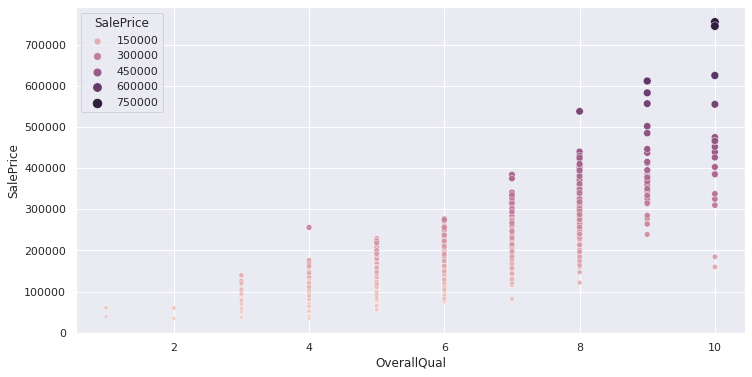

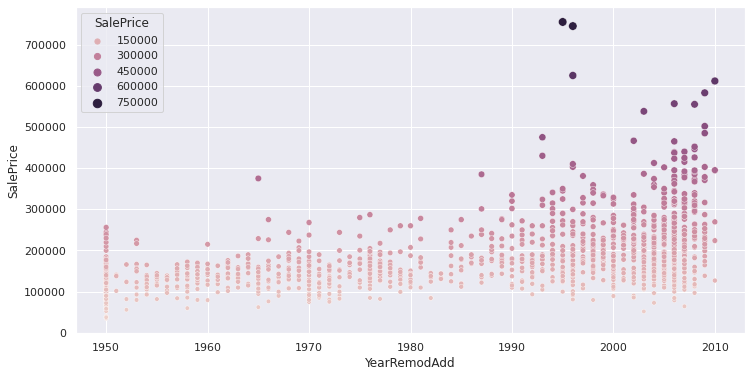

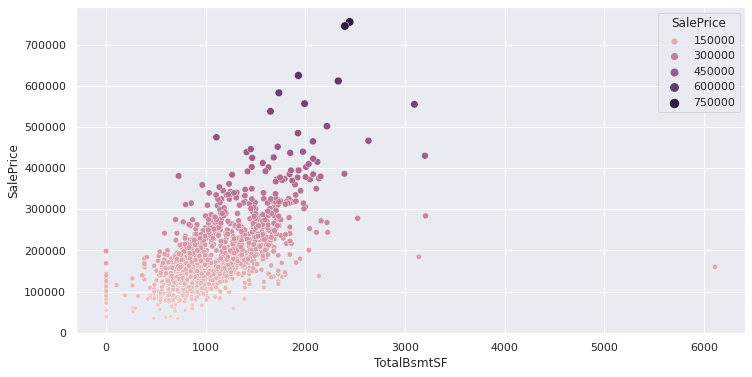

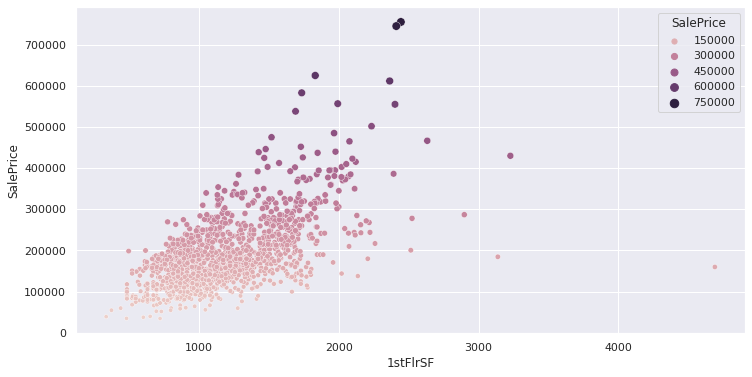

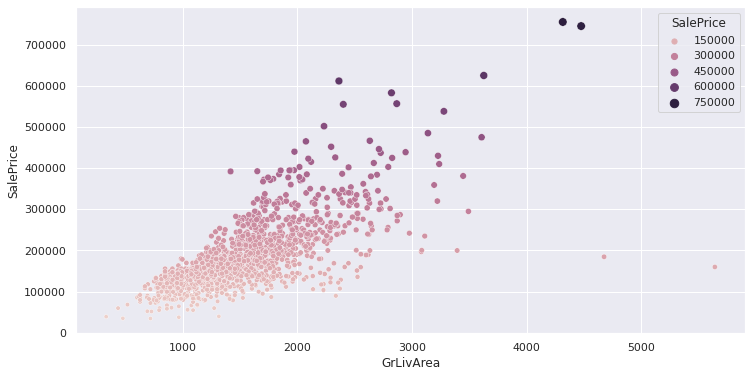

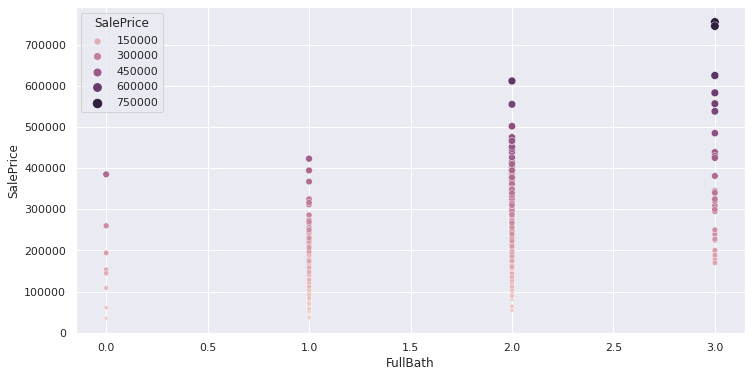

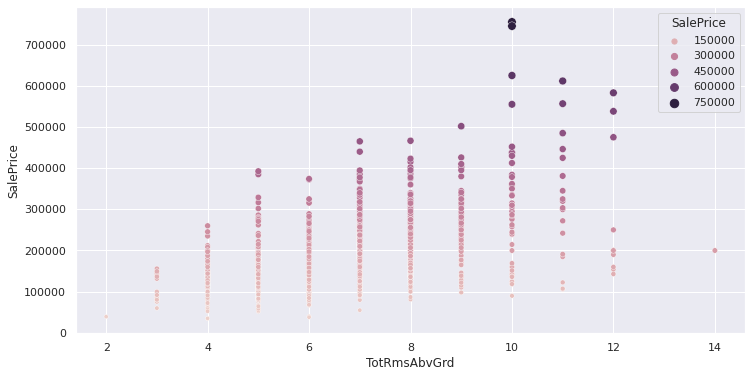

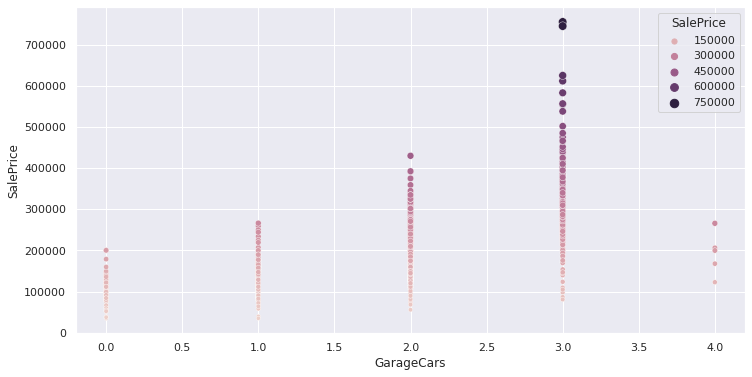

In [233]:
#Lets scatter features top 9 features 
features = ['OverallQual','TotalBsmtSF','1stFlrSF', 'GrLivArea','FullBath','TotRmsAbvGrd','GaragaArea','GarageCars','YearbBuilt','YearRemodAdd']

for i in train.columns:
    if i in features:
        plt.figure(figsize=(12,6))
        sns.scatterplot(x=i, y='SalePrice', hue='SalePrice' , data=train, size='SalePrice')
        plt.show()

As we can see from scatter plots there are outliers. Lets deal with those

**Removing Outliers**

In [287]:
# Remove outliers
train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)
train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<300000)].index, inplace=True)
train.drop(train[(train['1stFlrSF']>4000) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['TotalBsmtSF']>3000) & (train['SalePrice']<300000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)


**Filling Null Values**

Filling null values separately for avoid Data Leakage

In [288]:
# NA values should be None

train['Alley'] = train['Alley'].astype(object).replace(np.nan, 'None')
train['MasVnrType'] = train['MasVnrType'].astype(object).replace(np.nan, 'None')
train['BsmtQual'] = train['BsmtQual'].astype(object).replace(np.nan, 'None')
train['BsmtCond'] = train['BsmtCond'].astype(object).replace(np.nan, 'None')
train['BsmtExposure'] = train['BsmtExposure'].astype(object).replace(np.nan, 'None')
train['BsmtFinType1'] = train['BsmtFinType1'].astype(object).replace(np.nan, 'None')
train['BsmtFinType2'] = train['BsmtFinType2'].astype(object).replace(np.nan, 'None')
train['FireplaceQu'] = train['FireplaceQu'].astype(object).replace(np.nan, 'None')
train['GarageFinish'] = train['GarageFinish'].astype(object).replace(np.nan, 'None')
train['GarageType'] = train['GarageType'].astype(object).replace(np.nan, 'None')
train['GarageQual'] = train['GarageQual'].astype(object).replace(np.nan, 'None')
train['GarageCond'] = train['GarageCond'].astype(object).replace(np.nan, 'None')
train['PoolQC'] = train['PoolQC'].astype(object).replace(np.nan, 'None')
train['Fence'] = train['Fence'].astype(object).replace(np.nan, 'None')
train['MiscFeature'] = train['MiscFeature'].astype(object).replace(np.nan, 'None')

In [289]:
# NA values should be None

test['Alley'] = test['Alley'].astype(object).replace(np.nan, 'None')
test['MasVnrType'] = test['MasVnrType'].astype(object).replace(np.nan, 'None')
test['BsmtQual'] = test['BsmtQual'].astype(object).replace(np.nan, 'None')
test['BsmtCond'] = test['BsmtCond'].astype(object).replace(np.nan, 'None')
test['BsmtExposure'] = test['BsmtExposure'].astype(object).replace(np.nan, 'None')
test['BsmtFinType1'] = test['BsmtFinType1'].astype(object).replace(np.nan, 'None')
test['BsmtFinType2'] = test['BsmtFinType2'].astype(object).replace(np.nan, 'None')
test['FireplaceQu'] = test['FireplaceQu'].astype(object).replace(np.nan, 'None')
test['GarageFinish'] = test['GarageFinish'].astype(object).replace(np.nan, 'None')
test['GarageType'] = test['GarageType'].astype(object).replace(np.nan, 'None')
test['GarageQual'] = test['GarageQual'].astype(object).replace(np.nan, 'None')
test['GarageCond'] = test['GarageCond'].astype(object).replace(np.nan, 'None')
test['PoolQC'] = test['PoolQC'].astype(object).replace(np.nan, 'None')
test['Fence'] = test['Fence'].astype(object).replace(np.nan, 'None')
test['MiscFeature'] = test['MiscFeature'].astype(object).replace(np.nan, 'None')

In [290]:
# Replacing '-1' to 'None' from Electrical column

train['Electrical'] = train['Electrical'].astype(object).replace('-1', 'None')
test['Electrical'] = test['Electrical'].astype(object).replace('-1', 'None')

**Dealing with Skewness**

In [291]:
#creating new list for skewness without SalePrice
num_skewness = []
for i in num_columns:
  if i != 'SalePrice':
    num_skewness.append(i)


In [292]:
# Find skewed numerical features at train
skew_features_train = train[num_skewness].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew_train = skew_features_train[skew_features_train > 0.5]
skew_index_train = high_skew_train.index
print(high_skew_train)

MiscVal          24.418175
PoolArea         15.921472
LotArea          12.751622
3SsnPorch        10.279262
LowQualFinSF      8.989291
KitchenAbvGr      4.476748
BsmtFinSF2        4.268236
ScreenPorch       4.111400
BsmtHalfBath      4.092601
EnclosedPorch     3.081275
OpenPorchSF       2.341482
WoodDeckSF        1.545875
GrLivArea         1.010481
BsmtUnfSF         0.919769
1stFlrSF          0.891558
2ndFlrSF          0.810035
BsmtFinSF1        0.768512
HalfBath          0.677165
TotRmsAbvGrd      0.659474
Fireplaces        0.632849
BsmtFullBath      0.593548
dtype: float64


In [293]:
# Find skewed numerical features at train
skew_features_test = test[num_skewness].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew_test = skew_features_test[skew_features_test > 0.5]
skew_index_test = high_skew_test.index
print(high_skew_test)

PoolArea         20.176117
MiscVal          20.054543
LowQualFinSF     16.150628
3SsnPorch        12.511336
EnclosedPorch     4.664371
KitchenAbvGr      4.074860
ScreenPorch       3.784349
LotArea           3.112013
OpenPorchSF       2.685015
WoodDeckSF        2.128569
1stFlrSF          1.556592
GrLivArea         1.129240
2ndFlrSF          0.911944
TotRmsAbvGrd      0.841731
Fireplaces        0.819015
HalfBath          0.713993
dtype: float64


In [294]:
#Normalizing skewed feaures in train data
for i in skew_index_train:
    train[i] = boxcox1p(train[i], boxcox_normmax(train[i] + 1))

In [295]:
#Normalizing skewed feaures in test data
for i in skew_index_test:
    test[i] = boxcox1p(test[i], boxcox_normmax(test[i] + 1))

Let's take a look at the distribution of the 'SalePrice'.

In [243]:
def saleprice_distribution(data, column):
  sns.set_color_codes(palette='deep')
  fig, (ax1, ax2) = plt.subplots(figsize=(16, 8), ncols=2)
  sns.distplot(data[column], color = 'r', fit=norm, ax=ax1)
  # Get the fitted parameters used by the function
  (mu, sigma) = norm.fit(data[column])
  print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

  #Now plot the distribution
  ax1.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

  ax1.set_title('Distribution of SalePrice')
  ax1.set_xlabel('SalePrice in $')
  ax1.set_ylabel('Frequency')
  plt.figure()

  # P-P Plot
  stats.probplot(data[column], plot=ax2)
  plt.show()

  # Skewness and kurtosis
  print('*'*30)
  print("Skewness: %f" % data[column].skew())
  print("Kurtosis: %f" % data[column].kurt())
  print('*'*30)
  
  # Shapiro-Wilk normality test
  print('*'*30)
  print(column, 'Shapiro-Wilk test t score: ', "{:.2f}".format(stats.shapiro(data[column])[0]))
  print(column, 'Shapiro-Wilk test p value: ', "{:.2f}".format(stats.shapiro(data[column])[1]))
  print('*'*30)


 mu = 180810.57 and sigma = 79452.02



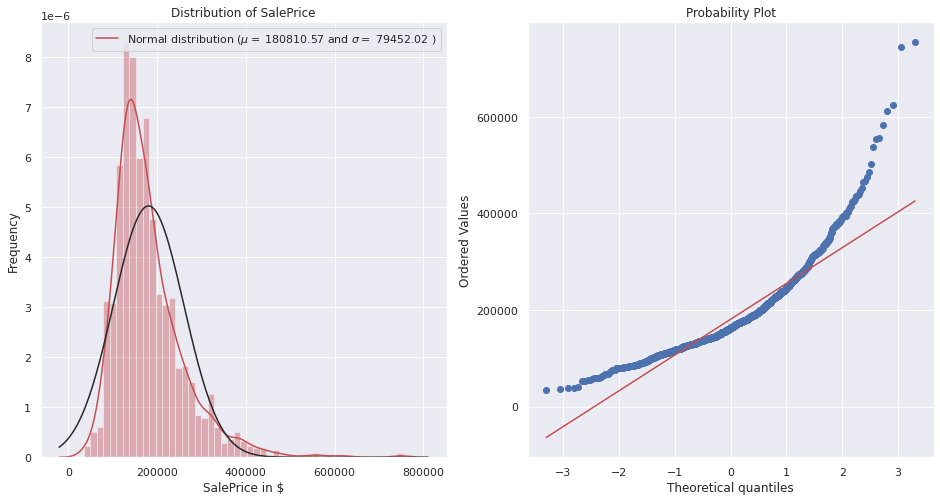

<Figure size 432x288 with 0 Axes>

******************************
Skewness: 1.887549
Kurtosis: 6.552911
******************************
******************************
SalePrice Shapiro-Wilk test t score:  0.87
SalePrice Shapiro-Wilk test p value:  0.00
******************************


In [244]:
saleprice_distribution(train, 'SalePrice')

'SalePrice' column is skewed to the right. We need to fix this problem because Machine Learning models don't do well with non-normally distributed data. We can solve this problem by using log(1+x) tranform.

In [262]:
train["SalePrice"] = np.log1p(train["SalePrice"])


 mu = 12.02 and sigma = 0.40



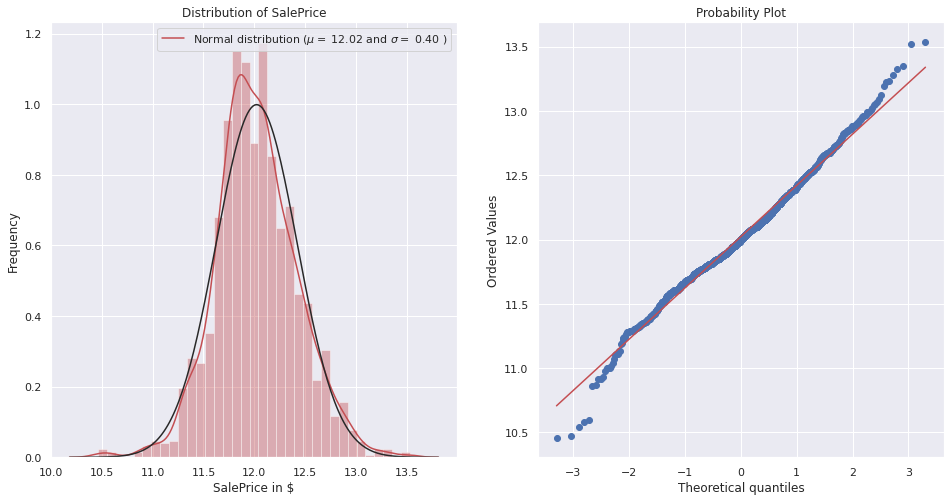

<Figure size 432x288 with 0 Axes>

******************************
Skewness: 0.124348
Kurtosis: 0.812606
******************************
******************************
SalePrice Shapiro-Wilk test t score:  0.99
SalePrice Shapiro-Wilk test p value:  0.00
******************************


In [246]:
saleprice_distribution(train, 'SalePrice')

The skewness seems now corrected.

**Train-Test Split**

In [296]:
from sklearn.model_selection import train_test_split

# Separate target from predictors
y = train['SalePrice']
X = train.drop(['SalePrice'], axis=1)

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, 
                                                      test_size=0.2,
                                                      random_state=42)

**Imputing Missing Data**

In [297]:
# Impute Missing Values for Numeric Columns
from sklearn.impute import SimpleImputer

# Imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train_imp = pd.DataFrame(imputer.fit_transform(X_train))
X_valid_imp = pd.DataFrame(imputer.transform(X_valid))
test_imp = pd.DataFrame(imputer.fit_transform(test))

# Imputation removed column names
X_train_imp.columns = X_train.columns
X_valid_imp.columns = X_valid.columns
test_imp.columns = test.columns

X_train = X_train_imp
X_valid = X_valid_imp
test = test_imp

**Creating New Features**

In [298]:
train["SqFtPerRoom"] = train["GrLivArea"] / (train["TotRmsAbvGrd"] +
                                                       train["FullBath"] +
                                                       train["HalfBath"] +
                                                       train["KitchenAbvGr"])

train['Total_Home_Quality'] = train['OverallQual'] + train['OverallCond']

train['Total_Bathrooms'] = (train['FullBath'] + (0.5 * train['HalfBath']) +
                               train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))

train["HighQualSF"] = train["1stFlrSF"] + train["2ndFlrSF"]

In [299]:
test["SqFtPerRoom"] = test["GrLivArea"] / (test["TotRmsAbvGrd"] +
                                                       test["FullBath"] +
                                                       test["HalfBath"] +
                                                       test["KitchenAbvGr"])

test['Total_Home_Quality'] = test['OverallQual'] + test['OverallCond']

test['Total_Bathrooms'] = (test['FullBath'] + (0.5 * test['HalfBath']) +
                               test['BsmtFullBath'] + (0.5 * test['BsmtHalfBath']))

test["HighQualSF"] = test["1stFlrSF"] + test["2ndFlrSF"]

**One-Hot-Encoding(Nominal Features)**

In [300]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[nominal_columns]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[nominal_columns]))

# One-hot encoding removed index
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Removing original categorical columns because we will replace those with one-hot encoding
num_X_train = X_train.drop(nominal_columns, axis=1)
num_X_valid = X_valid.drop(nominal_columns, axis=1)

# Add one-hot encoded columns to numerical features
X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

**Ordinal Encoding(Ordinal Features)**

In [301]:
from sklearn.preprocessing import OrdinalEncoder

LotShape_obj = ['Reg','IR1','IR2','IR3']
LandSlope_obj = ['Gtl','Mod','Sev']
OverallQual_obj = [1,2,3,4,5,6,7,8,9,10]
OverallCond_obj = [1,2,3,4,5,6,7,8,9,10]
ExterQual_obj = ['Ex','Gd','TA','Fa','Po']
ExterCond_obj = ['Ex','Gd','TA','Fa','Po']
BsmtQual_obj = ['Ex','Gd','TA','Fa','Po','None']
BsmtCond_obj = ['Ex','Gd','TA','Fa','Po','None']
BsmtExposure_obj = ['Gd','Av','Mn','No','None']
BsmtFinType1_obj = ['GLQ','ALQ','BLQ','Rec','LwQ','Unf','None']
BsmtFinType2_obj = ['GLQ','ALQ','BLQ','Rec','LwQ','Unf','None']
HeatingQC_obj = ['Ex','Gd','TA','Fa','Po']
KitchenQual_obj = ['Ex','Gd','TA','Fa','Po']
FireplaceQu_obj = ['Ex','Gd','TA','Fa','Po','None']
GarageQual_obj = ['Ex','Gd','TA','Fa','Po','None']
GarageCond_obj = ['Ex','Gd','TA','Fa','Po','None']
PoolQC_obj = ['Ex','Gd','TA','Fa','None']

# Apply ordinal encoder to each column with categorical data
OR_encoder = OrdinalEncoder(categories=[LotShape_obj, LandSlope_obj, OverallQual_obj,
                                       OverallCond_obj, ExterQual_obj,ExterCond_obj,
                                       BsmtQual_obj, BsmtCond_obj, BsmtExposure_obj,
                                       BsmtFinType1_obj, BsmtFinType2_obj, HeatingQC_obj,
                                       KitchenQual_obj, FireplaceQu_obj, GarageQual_obj,
                                       GarageCond_obj, PoolQC_obj])
OR_cols_train = pd.DataFrame(OR_encoder.fit_transform(X_train[ordinal_columns]))
OR_cols_valid = pd.DataFrame(OR_encoder.transform(X_valid[ordinal_columns]))


# Ordinal Encoder removed index
OR_cols_train.index = X_train.index
OR_cols_valid.index = X_valid.index

# Removing categorical columns
num_X_train = X_train.drop(ordinal_columns, axis=1)
num_X_valid = X_valid.drop(ordinal_columns, axis=1)

# Add ordinal encoded columns to numerical features
X_train = pd.concat([num_X_train, OR_cols_train], axis=1)
X_valid = pd.concat([num_X_valid, OR_cols_valid], axis=1)

**Feature Importance**

In [302]:
X = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize(na_sentinel=None)

discrete_features = X.dtypes == int

my_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
impute_X = pd.DataFrame(my_imputer.fit_transform(X))
impute_X.columns = X.columns
X = impute_X

**Mutual Information**

In [303]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

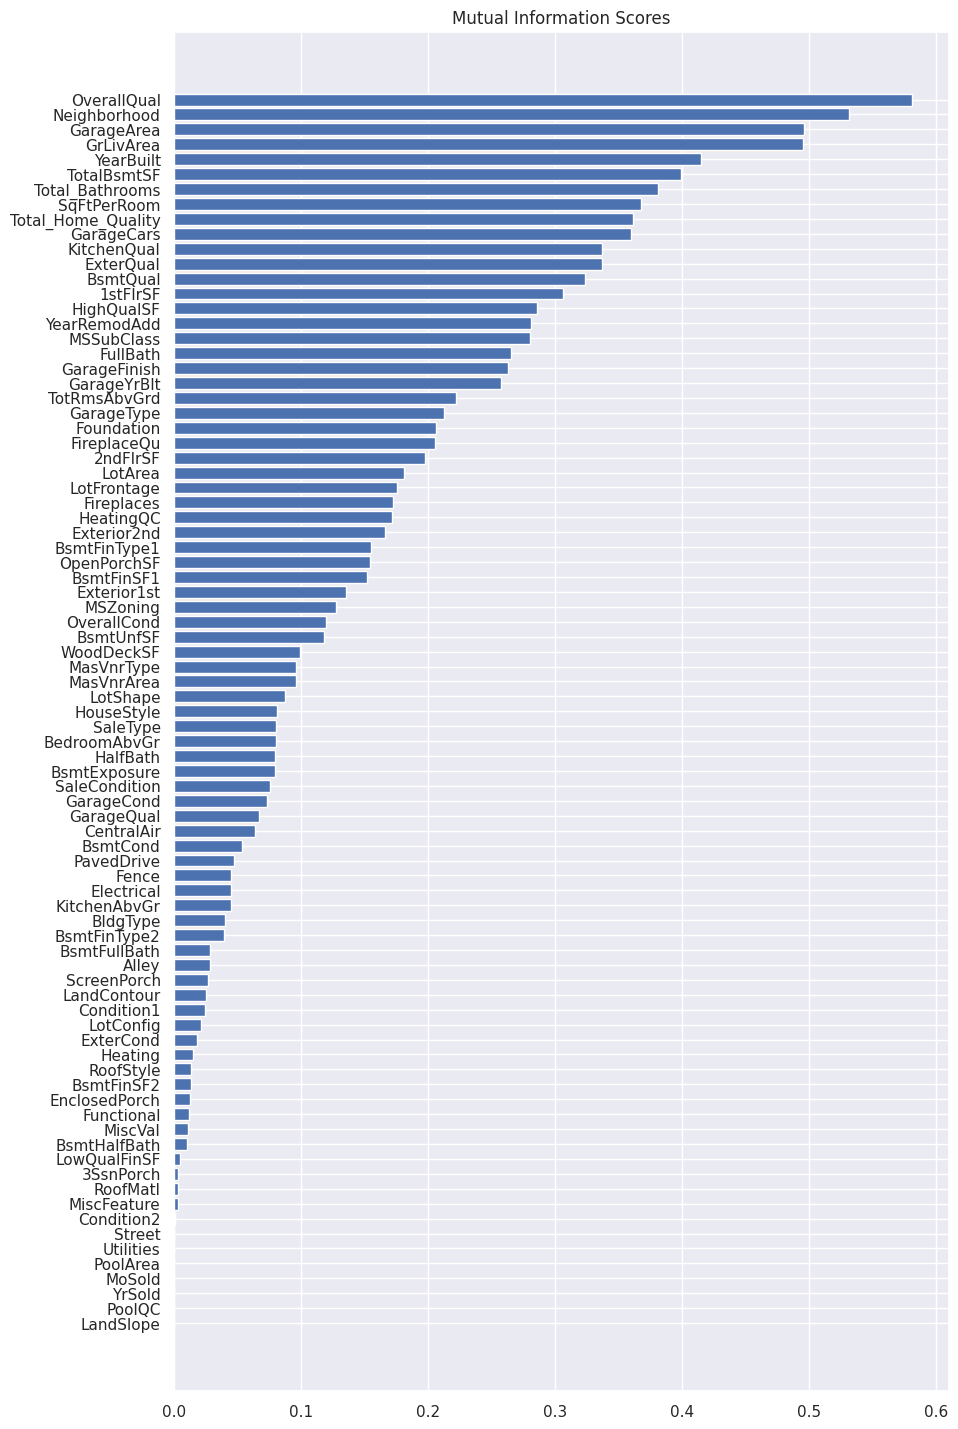

In [304]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(10, 18))
plot_mi_scores(mi_scores)

In [305]:
mi_scores[:20]

OverallQual           0.581087
Neighborhood          0.531398
GarageArea            0.496355
GrLivArea             0.495446
YearBuilt             0.414644
TotalBsmtSF           0.398832
Total_Bathrooms       0.380728
SqFtPerRoom           0.367557
Total_Home_Quality    0.361248
GarageCars            0.359566
KitchenQual           0.337331
ExterQual             0.337320
BsmtQual              0.323338
1stFlrSF              0.306358
HighQualSF            0.285690
YearRemodAdd          0.281365
MSSubClass            0.280081
FullBath              0.265577
GarageFinish          0.262933
GarageYrBlt           0.257710
Name: MI Scores, dtype: float64

**Model Selection with Feature Importance (MI Score)**

In [306]:
from sklearn.model_selection import train_test_split

# Separate target from predictors
y = train['SalePrice']
X = train[['OverallQual','Neighborhood','GarageArea','GrLivArea',
          'YearBuilt','TotalBsmtSF','GarageCars','Total_Bathrooms',
           'SqFtPerRoom','Total_Home_Quality','1stFlrSF',
          'BsmtQual','ExterQual','KitchenQual','MSSubClass','HighQualSF',
          'YearRemodAdd','LotArea','FullBath','GarageYrBlt','FireplaceQu']]

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, 
                                                      test_size=0.2,
                                                      random_state=0)

**Pipeline for Linear Regression**

In [307]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error

numerical_columns = [col for col in X.columns if col not in cat_columns]

nominal_columns = [col for col in X.columns if col in nominal_columns]

ordinal_columns = [col for col in X.columns if col in ordinal_columns]

numerical_transformer = SimpleImputer(strategy='most_frequent')

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[OverallQual_obj,BsmtQual_obj,ExterQual_obj,
                                           KitchenQual_obj,FireplaceQu_obj]))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('nom', nominal_transformer, nominal_columns),
        ('ord', ordinal_transformer, ordinal_columns)
    ])

model = LinearRegression()

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)

print('mae:',mean_absolute_error(y_valid, y_pred,))
print('mse:',mean_squared_error(y_valid, y_pred))
print('rmse:',mean_squared_error(y_valid, y_pred, squared=False))
print('target_mean:',y.mean())
print('target_std:',np.std(y))
print('r2 score:',r2_score(y_valid, y_pred))

mae: 20049.552484226286
mse: 764998802.591782
rmse: 27658.61172567745
target_mean: 180810.57417582418
target_std: 79452.01699404304
r2 score: 0.8658416156200933


**Pipeline for XGBRegressor**

In [309]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

numerical_columns = [col for col in X.columns if col not in cat_columns]

nominal_columns = [col for col in X.columns if col in nominal_columns]

ordinal_columns = [col for col in X.columns if col in ordinal_columns]

numerical_transformer = SimpleImputer(strategy='most_frequent')

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[OverallQual_obj,BsmtQual_obj,ExterQual_obj,
                                           KitchenQual_obj,FireplaceQu_obj]))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('nom', nominal_transformer, nominal_columns),
        ('ord', ordinal_transformer, ordinal_columns)
    ])

model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)

print('mae:',mean_absolute_error(y_valid, y_pred,))
print('mse:',mean_squared_error(y_valid, y_pred))
print('rmse:',mean_squared_error(y_valid, y_pred, squared=False))
print('target_mean:',y.mean())
print('target_std:',np.std(y))
print('r2 score:',r2_score(y_valid, y_pred))

[01:53:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mae: 16468.102886879282
mse: 600997944.7917092
rmse: 24515.25942737929
target_mean: 180810.57417582418
target_std: 79452.01699404304
r2 score: 0.894602562754696


**Pipeline for Catboost Regressor**

In [310]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

numerical_columns = [col for col in X.columns if col not in cat_columns]

nominal_columns = [col for col in X.columns if col in nominal_columns]

ordinal_columns = [col for col in X.columns if col in ordinal_columns]

numerical_transformer = SimpleImputer(strategy='most_frequent')

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[OverallQual_obj,BsmtQual_obj,ExterQual_obj,
                                           KitchenQual_obj,FireplaceQu_obj]))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('nom', nominal_transformer, nominal_columns),
        ('ord', ordinal_transformer, ordinal_columns)
    ])

model = CatBoostRegressor(iterations=200, verbose=False, learning_rate=0.2)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)

print('mae:',mean_absolute_error(y_valid, y_pred,))
print('mse:',mean_squared_error(y_valid, y_pred))
print('rmse:',mean_squared_error(y_valid, y_pred, squared=False))
print('target_mean:',y.mean())
print('target_std:',np.std(y))
print('r2 score:',r2_score(y_valid, y_pred))

mae: 15666.323623770271
mse: 506175009.35103595
rmse: 22498.333479416557
target_mean: 180810.57417582418
target_std: 79452.01699404304
r2 score: 0.9112317284184613


**Testing**

In [311]:
X_test = test[X.columns]
 
test_preds = pipeline.predict(X_test)
output = pd.DataFrame({'Id': test.Id,
                       'SalePrice': test_preds})
output.head()

Id      SalePrice
0  1461  140554.097305
1  1462  153235.541684
2  1463  158715.048657
3  1464  170669.445740
4  1465  208913.160643